In [1]:
import os

os.environ['OPENBLAS_NUM_THREADS'] = '20'
os.environ['MKL_NUM_THREADS'] = '20'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime as dt
import copy
import statsmodels.api as sm
from matplotlib.colors import LogNorm
import xarray as xr
import pickle
import random
import time
import signal
import multiprocessing
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from scipy import interpolate
import random
import lightgbm as lgb
import itertools
from scipy import spatial
import joblib



def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import sys
sys.path.insert(1,'/home/jsperezc/jupyter/AQ_Forecast/functions/')
import postprocessing
from preprocessing import *

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import RegressorChain, MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit




Últimas actualizaciones:

 14 de marzo de 2023 
1. Se modifica la función meteo al subpaquete airquality.read_data, la cual permite la lectura de datos de las estaciones meteorologicas, se optimizo la consulta de vaisalas por lo que se elimino el argumento vaisala y se agrego el argumento flags para obtener los indices de validación (permite conteos de calidad, dada la reciente necesidad).
    Ej. read.meteo(Fechai='2023-01-01 00:00', Fechaf='2023-03-01 00:00',estaciones=['BAR-PDLA','ITA-CJUS','V-ITA-CONC'],printquery=True, flags=False).data

 20 de abril de 2023 
2. Se modifica la función plot_barras_ICA_anual del subpaquete airquality.plots, se añade argumento de número de días en el año para graficar las barras para algunos meses en el año, para varios años.
    Ej. plots.plot_barras_ICA_anual(var='PM2.5', df=df,n_day=60)

 04 de mayo de 2023 
3. Se agrega la función porcentaje_validados al subpaquete airquality.data_analysis, el cual permite la obtencion del porcentaje de datos va

In [2]:
from trajectories import *

# Compute IFRP (just had to do it once)

In [64]:
# path_bt = '/var/data1/AQ_Forecast_DATA/historic/GFS/validation_rev1/Vientos/BT/'

In [65]:
# #################### LECTURA INCENDOS HISTÓRICOS ########################
# import datetime as dt
# df_fires = pd.read_csv('/var/data1/AQ_Forecast_DATA/historic/Fires/fire_archive_M-C61_246192.csv')

# str_time = df_fires['acq_time'].values.astype(str)
# str_time = np.array([str_time[i].zfill(4) for i in range(len(str_time))])
# str_date = df_fires['acq_date'].values.astype(str)

# dates_fires = np.array([dt.datetime.strptime(str_date[i]+' '+str_time[i],'%Y-%m-%d %H%M').replace(minute = 0) \
#     for i in range(len(str_time))])
# df_fires.index = dates_fires
# #df_fires.index = df_fires.index - dt.timedelta(hours = 5)
# print(df_fires.shape)

(2980521, 15)


In [66]:
# def read_nc(file_i):
#     """Función que lee los archivos donde se almacenan las BT
#     diarias y devuelve cada componente"""
#     Variable = Dataset(file_i,'r')

#     dates  = np.array(Variable.variables['time'][:])

#     fechas = pd.to_datetime("1900-01-01 00:00:00") \
#                     + pd.to_timedelta(dates, unit='h')

#     lon_values = np.array(Variable.variables['lon'][:])
#     lat_values = np.array(Variable.variables['lat'][:])
#     plev_values = np.array(Variable.variables['level'][:]) #shape 24x241
#     fechas = np.array(fechas).reshape(plev_values.shape)
    
#     return fechas, plev_values, lat_values, lon_values

# def meters_to_degrees(meters):
#     r_earth = 6378000  ##Radio de la tierra en meters
#     return ((meters *180) / (r_earth*np.pi))

# def search_fire(lon,lat, poligono):
#     """saber si un punto x,y está o no dentro de un polygon"""
#     aa = ss.Point([lon,lat])
#     return poligono.contains(aa)

# df_IFRP = []
# archivos = np.sort(glob.glob(os.path.join(path_bt, 
#                             '*800hPa*2020*4days*.nc')))

# archivos_procesados = [x[len(path_bt):-3].split('.')[-2] \
#                            for x in  archivos] 

In [68]:
# def compute_IFRP(filename):
#     fechas, plev_values, lat_values, lon_values = read_nc(filename)
#     #fechas = fechas[~np.isnan(fechas)]
#     [dates_dim, back_step_dim] = fechas.shape
#     #print("arch leido")
#     '''
#     dates_dim:      dimensión de las fechas a partir de las cuales se van a 
#                     calcular las trayectorias
#     back_step_dim:  dimensión de las fechas en retroceso de la retrotrayectoria 
#     ''' 
#     days_b = 4
#     m_buffer = 50_000
#     list_IFRP = []
    
#     for dt_i in (range(dates_dim)):
#         fila_IFRP=[]
#         fila_IFRP.append(str(fechas[:,0][dt_i]))
#     #     print(str(fechas[:,0][dt_i]))
#         ind_dias_atras = days_b*24 ## 4 porque fueron los días hacia atrás seleccionados finalmente 
#         lat_i = lat_values[dt_i,:ind_dias_atras] #todas las latitudes de la retrotrayectoria iniciada en el timepo dt_i
#         lon_i = lon_values[dt_i,:ind_dias_atras]        
#         lat_i = lat_i[~np.isnan(lat_i)]
#         lon_i = lon_i[~np.isnan(lon_i)]
#         #geom_list = [(x, y) for x, y  in zip([lon_i], [lat_i])]
#         geom_list_2 = LineString((zip(lon_i, lat_i)))

#         fechas_i = fechas[dt_i][~np.isnan(fechas[dt_i])]
#         fechas_i = fechas_i[:ind_dias_atras]
#         grado = meters_to_degrees(m_buffer) ## Los kilómetros del buffer
#         poligon_buffer = geom_list_2.buffer(grado)
#         poligon_buffer
#         IFRP = 0

#         fecha_ini = pd.to_datetime(fechas[0][0]) - dt.timedelta(days =4.5)
#         fires_retro = df_fires[str(fecha_ini):str(fechas[0][0])] 

#         for fire in range(len(fires_retro)):
#             lat_fire = fires_retro["latitude"][fire]
#             lon_fire = fires_retro["longitude"][fire]
#             aa = search_fire(lon_fire, lat_fire, poligon_buffer)
#             if aa:
#                 IFRP = IFRP+ fires_retro["frp"][fire]
#         fila_IFRP.append(IFRP)
#         list_IFRP.append(fila_IFRP)
#     path_out_IFRP ="/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/"
#     df_IFRP = pd.DataFrame(list_IFRP, columns = ["fecha", "IFRP"])
#     df_IFRP.to_csv(path_out_IFRP + f"{filename.split('.')[-3]}.csv")
#     print(path_out_IFRP + f"{filename.split('.')[-3]}.csv")
    

In [69]:
# # Just had to do it once....

# from multiprocessing import Pool

# # processing (multiprocessing)
# with Pool(10) as p:
#     result = p.map(compute_IFRP, archivos)

/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020031218.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020031012.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020031500.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020031706.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020030600.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020031912.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020032118.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020030806.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020032606.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020031300.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020032400.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020031506.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Vali

/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020041618.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020042800.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020042606.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020042112.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020050318.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020043006.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020050200.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020033012.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020042406.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020041900.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020042612.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/2020042806.csv
/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Vali

# Versión add: se obtiene un DF con la info consolidada

In [3]:
#Definiendo paths para cargar la info
gfs_path = '/var/data1/AQ_Forecast_DATA/historic/GFS/validation_rev1/'
cams_path = '/var/data1/AQ_Forecast_DATA/historic/CAMS/Pronostico/'
path_IFRP ="/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/"
files_ifrp = np.sort(glob.glob(path_IFRP+'2020*'))
dates_ifrp = np.array([dt.datetime.strptime(files_ifrp[i].split('/')[-1][:-4],'%Y%m%d%H')\
    for i in range(len(files_ifrp))])

## Obtener la información requerida (SOLO SE CORRE UNA VEZ!!!)

In [36]:
def get_cams_for_forecast(forecast_initial_date,path_data,operational = True,latlon=None):
    ## forecast_date_0: initial hour of forecast (last hour in which pm2.5 data is available)
    ## path_data: if historic run then folder cams forecast subdirectory: year/month/CAMS_date_hour.nc
    ## gfs_correlations_path: path with pm2.5 vs gfs variables correlation matrices (for optimally averaging)
    ## operational: False when it is a historic run
    ## latlon: coordenates of station, if None the output will be the mean for the Aburra Valley
    
    latency = 10 # hours
    
    if operational == False:
        files_cams = []
        dirs_cams = []
        for root, dirs, files in os.walk(path_data,followlinks=True):
            for file in files:
                files_cams.append(file)
            for dirtemp in dirs:
                dirs_cams.append(dirtemp)
        files_cams = np.sort(files_cams)
        initial_dates_cams_files = np.array([dt.datetime.strptime(files_cams[i].split('/')[-1].split('.')[0],\
            'CAMS_%Y%m%d_%H%M%S') for i in range(len(files_cams))])
        cams_2_files = [files_cams[np.where(initial_dates_cams_files - dt.timedelta(hours = 5) \
            <= forecast_initial_date - dt.timedelta(hours = latency))[0]][-1]]
        tempfile1 = path_data+cams_2_files[0].split('_')[1][:4]+'/'+cams_2_files[0].split('_')[1][4:6]+'/'+cams_2_files[0]
        cams_2_files = [tempfile1]
    else:
        files_cams = np.sort(glob.glob(path_data+'CAMS_*_*.nc'))
        initial_dates_cams_files = np.array([dt.datetime.strptime(files_cams[i].split('/')[-1].split('.')[0],\
            'CAMS_%Y%m%d_%H%M%S') for i in range(len(files_cams))])
        cams_2_files = files_cams[-1]
    ### Read the files and keep the most updated value
#     print(cams_2_files)
    dataset_1 = xr.open_mfdataset(cams_2_files)
    cams_total = xr.concat([dataset_1], dim = "time")
    cams_recorte = postprocessing.recorte_espacial(cams_total)
    #variables_cams = ['aod550','bcaod550','pm2p5','duaod550','omaod550','ssaod550','niaod550','amaod550','suaod550']
    variables_cams = ['aod550','bcaod550','pm2p5']
    
    lat = cams_recorte.latitude.values
    lon = cams_recorte.longitude.values

    if latlon == None: ## Get mean series
        dic_cams = {}
        for variable in variables_cams:
            dic_cams[variable] = np.mean(cams_recorte[variable][:],axis = [1,2]).values
        df_CAMS = pd.DataFrame(dic_cams,index = cams_recorte.time)
        df_CAMS['pm2p5'] = df_CAMS['pm2p5'] * 1000_000_000 #ug/m3
    else: ## Nearest point
        lat_station = latlon[0]
        lon_station = latlon[1]
        ilon = np.argmin(abs(lon_station-lon))
        ilat = np.argmin(abs(lat_station-lat))

        dic_cams = {}
        for variable in variables_cams:
            dic_cams[variable] = cams_recorte[variable][:,ilat,ilon].values
        df_CAMS = pd.DataFrame(dic_cams,index = cams_recorte.time)
        df_CAMS['pm2p5'] = df_CAMS['pm2p5'] * 1000_000_000 #ug/m3
    
    df_CAMS.index = df_CAMS.index - dt.timedelta(hours = 5)

#     df_CAMS = df_CAMS[['aod550','bcaod550','pm2p5']]
    df_CAMS = df_CAMS[['aod550','bcaod550','pm2p5']]
    df_CAMS.columns = ['aod','bcaod','pm2p5_cams']
#     df_CAMS.columns = ['aod','bcaod','pm2p5_cams']    
#     print(df_CAMS)
    df_optimal_cams = pd.DataFrame(index = df_CAMS.index)
    df_optimal_cams['aod'] = df_CAMS.aod.rolling(3,min_periods=1).mean()
#     df_optimal_cams['ssaod'] = df_CAMS.ssaod.rolling(9,min_periods=1).mean()
#     df_optimal_cams['omaod'] = df_CAMS.omaod.rolling(12,min_periods=1).mean()
#     df_optimal_cams['duaod'] = df_CAMS.duaod.rolling(1,min_periods=1).mean()
    df_optimal_cams['bcaod'] = df_CAMS.bcaod.rolling(1,min_periods=1).mean()
    df_optimal_cams['pm2p5_cams'] = df_CAMS.pm2p5_cams.rolling(3,min_periods=1).mean()
    
    return df_CAMS,df_optimal_cams

In [37]:
#Obteniendo la información requerida para la estimación
stations = ["ITA-CJUS", "CAL-LASA", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
            "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
            "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]
stations = ["ITA-CJUS", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
            "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
            "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]
stations = ["MED-SELE", "MED-LAYE", "SUR-TRAF", "CAL-JOAR"]
stations = ["ITA-CJUS", "EST-HOSP", "MED-ALTA", "MED-VILL", "MED-ARAN"]

coor_esta= pd.read_csv("/var/data1/AQ_Forecast_DATA/historic/PM25/CoordenadasEstaciones.csv", index_col= "Nombre")

#for station in stations[4:]:
for station in stations:
    print(station)
    lat_est = coor_esta.loc[station].Latitud
    lon_est = coor_esta.loc[station].Longitud

    date_start_validation = dt.datetime(2020,4,1,0)
    date_end_validation = dt.datetime(2020,5,31,18)
    dates_start_forecast = pd.date_range(date_start_validation,date_end_validation,freq = '1H')
    df_pm2p5_full = get_pm2p5_period(dates_start_forecast[0]-dt.timedelta(hours=200),
                                         dates_start_forecast[-1]+dt.timedelta(hours=200),station_name = station)
    
    dates = []
    X = []
    Y_validation = []

    for i in range(len(dates_start_forecast)):
#     for i in range(200):
    # for i in [2000]:
        if i%100==0:
            print(i)

        # ### Initial date of forecast ###
        forecast_initial_date = dates_start_forecast[i]

        ### Get future and past PM2.5 ### Change rolling window here
        pm_validation_temp = df_pm2p5_full.rolling(24,min_periods=16).mean()[forecast_initial_date:\
            forecast_initial_date+dt.timedelta(hours = 95)]

        max_lag = 48 ## Maximum lag used
        x_shifts = pd.concat([df_pm2p5_full['PM2.5'].shift(i) for i in range(max_lag,0,-1)],axis = 1).dropna()
        x_shifts.columns = (-np.arange(max_lag,0,-1)).astype(str)

        ### Get GFS and CAMS ###
        df_GFS,df_optimal_gfs = get_gfs_for_forecast(forecast_initial_date,\
            gfs_path,operational = False,latlon = (lat_est,lon_est))
        df_CAMS,df_optimal_cams = get_cams_for_forecast(forecast_initial_date,\
            cams_path,operational = False,latlon = (lat_est,lon_est))

        ### Get IFRP
        file_ifrp = files_ifrp[dates_ifrp<=forecast_initial_date.to_pydatetime()+\
                   dt.timedelta(hours=5)-dt.timedelta(hours=10)][-1]
        df_IFRP = pd.read_csv(file_ifrp,index_col=1,parse_dates=True)[['IFRP']]
        df_IFRP.index = df_IFRP.index-dt.timedelta(hours=5)

        ### Select inputs for forecasting

        index_future = pm_validation_temp.index
        try:
            x_shifts_temp = x_shifts.loc[forecast_initial_date].values
        except:
            print('x_shifts Failed - i='+str(i))
            continue
        try:
            cams_future = df_optimal_cams.loc[index_future[0]:].iloc[np.arange(0,97,3),:]
        except:
            print('CAMS Failed - i='+str(i))
            continue
        aod_future = cams_future['aod'].values
        bc_future = cams_future['bcaod'].values
        pm2p5_future = cams_future['pm2p5_cams'].values
        try:
            gfs_future = df_optimal_gfs.loc[index_future[0]:].iloc[np.arange(0,97,3),:]
        except:
            print('GFS Failed - i='+str(i))
            continue
        tcc_future = gfs_future['tcc'].values
        rad_future = gfs_future['rad'].values
        prate_future = gfs_future['prate'].values
        hpbl_future = gfs_future['hpbl'].values
        cin_future = gfs_future['cin'].values
        try:
            ifrp50_future = df_IFRP.rolling(3,center=True).max().loc[index_future[0]:].iloc[np.arange(0,97,3),0].values
        except:
            print('IFRP Failed - i='+str(i))
            continue
        df_hour = pd.DataFrame(pm_validation_temp.index.hour, index = pm_validation_temp.index)
        hod1_future = np.sin(2*np.pi*(df_hour/24)).iloc[np.arange(0,24,1),0].values
        hod2_future = np.cos(2*np.pi*(df_hour/24)).iloc[np.arange(0,24,1),0].values

        df_dow = pd.DataFrame(pm_validation_temp.index.dayofweek, index = pm_validation_temp.index)
        dow1_future = np.sin(2*np.pi*(df_dow/7)).iloc[np.arange(0,96,24),0].values
        dow2_future = np.cos(2*np.pi*(df_dow/7)).iloc[np.arange(0,96,24),0].values

        x_temp = np.hstack([x_shifts_temp,
            aod_future,
        #     bc_future,
        #     pm2p5_future,
            tcc_future,
        #     rad_future,
            prate_future,
            hpbl_future,
        #     cin_future,
            ifrp50_future,
            dow1_future,
            dow2_future,
            hod1_future,
            hod2_future])

        y_temp = pm_validation_temp.values[:,0]
        if (len(y_temp[np.isfinite(y_temp)==False])==0)&(len(x_temp[np.isfinite(x_temp)==False])==0):
            X.append(x_temp)
            Y_validation.append(y_temp)

            dates.append(forecast_initial_date)
    X = np.array(X)
    Y_validation = np.array(Y_validation)
    dates = np.array(dates)
    
    np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2020_X',X)
    np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2020_Y_validation',Y_validation)
    np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2020_dates',dates)

ITA-CJUS
0
GFS Failed - i=0
GFS Failed - i=1
GFS Failed - i=2
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
EST-HOSP
0
GFS Failed - i=0
GFS Failed - i=1
GFS Failed - i=2
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
MED-ALTA
0
GFS Failed - i=0
GFS Failed - i=1
GFS Failed - i=2
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
MED-VILL
0
GFS Failed - i=0
GFS Failed - i=1
GFS Failed - i=2
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
MED-ARAN
0
GFS Failed - i=0
GFS Failed - i=1
GFS Failed - i=2
100
200
300
400
500
600
700
800
x_shifts Failed - i=823
x_shifts Failed - i=824
x_shifts Failed - i=825
x_shifts Failed - i=826
x_shifts Failed - i=827
x_shifts Failed - i=828
x_shifts Failed - i=829
x_shifts Failed - i=830
x_shifts Failed - i=831
x_shifts Failed - i=832
x_shifts Failed - i=833
x_shifts Failed - i=834
x_shifts Failed - i=835
x_shifts Failed - i=836
x_shifts Failed - i=837
x_shifts Failed - i=838
x_shifts Failed - i=839
x_shif

## Obteniendo estimados del modelo y guardando en DataFrames (SOLO SE CORRE UNA VEZ!!)

### Periodo de evaluación

In [38]:
stations = ["ITA-CJUS", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
            "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
            "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]
# stations = ["EST-HOSP", "MED-ALTA", "MED-VILL",
#             "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
#             "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]
#stations = ["MED-SELE", "MED-LAYE", "SUR-TRAF", "CAL-JOAR"]
stations = ["ITA-CJUS", "EST-HOSP", "MED-ALTA", "MED-VILL", "MED-ARAN"]
# stations = ["ITA-CJUS", "ITA-CONC", "MED-LAYE", "EST-HOSP", "MED-ALTA", "MED-VILL",
#             "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
#             "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]

coor_esta= pd.read_csv("/var/data1/AQ_Forecast_DATA/historic/PM25/CoordenadasEstaciones.csv", index_col= "Nombre")

#Recorriendo estaciones
for station in stations:
    print(station)
    X = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2020_X.npy',allow_pickle=True)
    Y_validation = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2020_Y_validation.npy',allow_pickle=True)
    dates = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2020_dates.npy',allow_pickle=True)
    scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
    scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')
    X_scaled = scaler_x.transform(X)
    
    #Diccionario para guardar los resultados del modelo
    DictModels = {}

    for model_name in ['GB_CH','GB_MO','RF_CH','RF_MO','LR_RC','LR_MO']:
        print(model_name)
        
        #Pronosticando
        estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators_v3/'+station+'_'+model_name+'.mdl')
        Y_predicted_scaled = estimator_temp.predict(X_scaled)
        Y_predicted = scaler_y.inverse_transform(Y_predicted_scaled)
        
        #Guardando en dict
        DictModels[model_name] = Y_predicted
    
    #Lista para guardar resultados en esta estación (de cada paso de tiempo)
    LsDFs = []
        
    #Creando DataFrame con esta información
    for idx in range(Y_validation.shape[0]):
        #Creando diccionario con información
        DictData = {'station': [station for i in range(96)], 'date_init': [dates[idx] for i in range(96)],
                    'date_real': [dates[idx] + pd.Timedelta(hours=i+1) for i in range(96)],
                    'forewindow': [i+1 for i in range(96)], 'PM2p5': Y_validation[idx], 
                    'GB_CH': DictModels['GB_CH'][idx], 'GB_MO': DictModels['GB_MO'][idx],
                    'RF_CH': DictModels['RF_CH'][idx], 'RF_MO': DictModels['RF_MO'][idx],
                    'LR_RC': DictModels['LR_RC'][idx], 'LR_MO': DictModels['LR_MO'][idx]}

        #Creando DataFrame y guardando en lista
        LsDFs.append(pd.DataFrame(data=DictData))
    
    #Concatenando y obteniendo diccionario para esta estación
    TotalValDF_sta = pd.concat(LsDFs).reset_index(drop=True)

    #Guardando resultados para esta estación
    dirout_foresta = '/var/data1/AQ_Forecast_DATA/validation_results_addcases/'
    TotalValDF_sta.to_csv(dirout_foresta + 'TotalVal_{0}_2020.csv'.format(station), header=True, index=False)

    
    print(station, "finished!!")
    #raise NameError


ITA-CJUS
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
ITA-CJUS finished!!
EST-HOSP
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
EST-HOSP finished!!
MED-ALTA
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-ALTA finished!!
MED-VILL
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-VILL finished!!
MED-ARAN
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-ARAN finished!!


### Periodo de referencia

In [39]:
stations = ["ITA-CJUS", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
            "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
            "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]
# stations = ["EST-HOSP", "MED-ALTA", "MED-VILL",
#             "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
#             "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]
#stations = ["MED-SELE", "MED-LAYE", "SUR-TRAF", "CAL-JOAR"]
stations = ["ITA-CJUS", "EST-HOSP", "MED-ALTA", "MED-VILL", "MED-ARAN"]
# stations = ["ITA-CJUS", "ITA-CONC", "MED-LAYE", "EST-HOSP", "MED-ALTA", "MED-VILL",
#             "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
#             "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]

coor_esta= pd.read_csv("/var/data1/AQ_Forecast_DATA/historic/PM25/CoordenadasEstaciones.csv", index_col= "Nombre")

#Recorriendo estaciones
for station in stations:
    print(station)
    X = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_X.npy',allow_pickle=True)
    Y_validation = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_Y_validation.npy',allow_pickle=True)
    dates = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_dates.npy',allow_pickle=True)
    scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
    scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')
    X_scaled = scaler_x.transform(X)
    
    #Diccionario para guardar los resultados del modelo
    DictModels = {}

    for model_name in ['GB_CH','GB_MO','RF_CH','RF_MO','LR_RC','LR_MO']:
        print(model_name)
        
        #Pronosticando
        estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators_v3/'+station+'_'+model_name+'.mdl')
        Y_predicted_scaled = estimator_temp.predict(X_scaled)
        Y_predicted = scaler_y.inverse_transform(Y_predicted_scaled)
        
        #Guardando en dict
        DictModels[model_name] = Y_predicted
    
    #Lista para guardar resultados en esta estación (de cada paso de tiempo)
    LsDFs = []
        
    #Creando DataFrame con esta información
    for idx in range(Y_validation.shape[0]):
        #Creando diccionario con información
        DictData = {'station': [station for i in range(96)], 'date_init': [dates[idx] for i in range(96)],
                    'date_real': [dates[idx] + pd.Timedelta(hours=i+1) for i in range(96)],
                    'forewindow': [i+1 for i in range(96)], 'PM2p5': Y_validation[idx], 
                    'GB_CH': DictModels['GB_CH'][idx], 'GB_MO': DictModels['GB_MO'][idx],
                    'RF_CH': DictModels['RF_CH'][idx], 'RF_MO': DictModels['RF_MO'][idx],
                    'LR_RC': DictModels['LR_RC'][idx], 'LR_MO': DictModels['LR_MO'][idx]}

        #Creando DataFrame y guardando en lista
        LsDFs.append(pd.DataFrame(data=DictData))
    
    #Concatenando y obteniendo diccionario para esta estación
    TotalValDF_sta = pd.concat(LsDFs).reset_index(drop=True)

    #Guardando resultados para esta estación
    dirout_foresta = '/var/data1/AQ_Forecast_DATA/validation_results_addcases/'
    TotalValDF_sta.to_csv(dirout_foresta + 'TotalVal_{0}_2021.csv'.format(station), header=True, index=False)

    
    print(station, "finished!!")
    #raise NameError

ITA-CJUS
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
ITA-CJUS finished!!
EST-HOSP
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
EST-HOSP finished!!
MED-ALTA
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-ALTA finished!!
MED-VILL
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-VILL finished!!
MED-ARAN
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-ARAN finished!!


## Figures (evaluation)

### Comparando periodos

In [24]:
#Importando airquality
import sys
sys.path.append('/home/calidadaire/Paquete/')
import airquality.read_data as aqread

#Definiendo periodos de interés
datei_2020 = '2020-04-20 00:00'
datef_2020 = '2020-04-30 23:00'
datei_2021 = '2021-04-20 00:00'
datef_2021 = '2021-04-30 23:00'

#Estaciones
aqstations = ["ITA-CJUS", "CAL-LASA", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL", 
              "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
              "SAB-RAME", "MED-SELE","CEN-TRAF", "SUR-TRAF"]

#Cargando datos de calidad del aire
pm25_2020 = aqread.PM25(Fechai=datei_2020, Fechaf=datef_2020, estaciones=aqstations)
pm25_2020 = pm25_2020.data
pm25_2021 = aqread.PM25(Fechai=datei_2021, Fechaf=datef_2021, estaciones=aqstations)
pm25_2021 = pm25_2021.data

In [28]:
pm25_2020.mean(axis=1).mean() - pm25_2021.mean(axis=1).mean()

-3.734958186650198

In [29]:
Mean2020 = pm25_2020.mean(axis=1).mean()
Mean2021 = pm25_2021.mean(axis=1).mean()

In [31]:
((Mean2020 - Mean2021) / Mean2021) * 100

-19.26156378413451

-0.5569336329745873


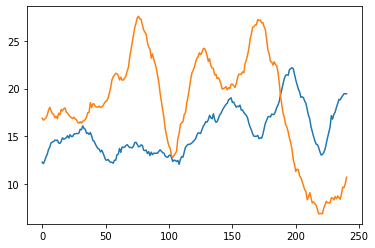

In [10]:
### CARGANDO INFORMACIÓN
#Directorio de entrada
import datetime
dirin_foresta = '/var/data1/AQ_Forecast_DATA/validation_results_addcases/'
dirout_figs = './Figures/'
#Estación
sta = 'CAL-JOAR'

#Periodo de pandemia
TotalValDF_sta_2020 = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2020.csv'.format(sta),
                             parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2020-04-20 00:00': '2020-04-30 00:00'].reset_index()
#Periodo de referencia
TotalValDF_sta_2021 = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2021.csv'.format(sta),
                             parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2021-04-20 00:00': '2021-04-30 00:00'].reset_index()

#Figura
TotalValDF_sta_2020[TotalValDF_sta_2020.forewindow == 1].set_index('date_init').resample('1H').first().reset_index()['PM2p5'].plot()
TotalValDF_sta_2021[TotalValDF_sta_2021.forewindow == 1].set_index('date_init').resample('1H').first().reset_index()['PM2p5'].plot()

#Diferencias
print(np.mean(TotalValDF_sta_2020['PM2p5'].iloc[:]) - np.mean(TotalValDF_sta_2021['PM2p5'].iloc[:]))

In [11]:
TotalValDF_sta_2020[TotalValDF_sta_2020.forewindow == 1].set_index('date_init').resample('1H').first().reset_index()['PM2p5']

0      12.272327
1      12.124477
2      12.421900
3      12.817483
4      13.113749
         ...    
236    19.066671
237    19.265284
238    19.463871
239    19.462588
240    19.462159
Name: PM2p5, Length: 241, dtype: float64

### Errores by lead-time

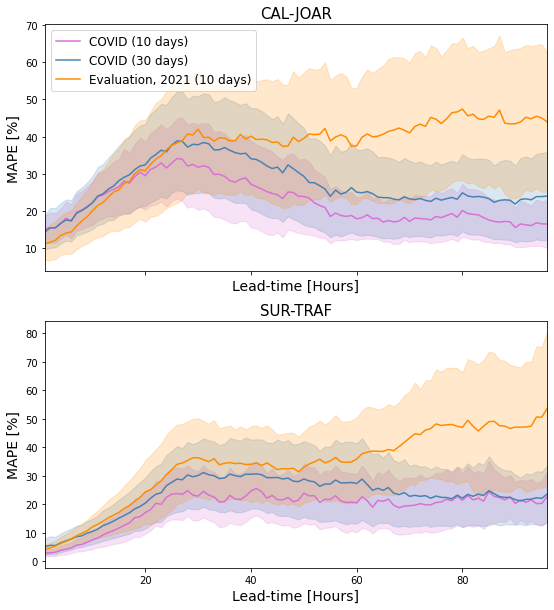

In [47]:
#Directorio de entrada
import datetime
dirin_foresta = '/var/data1/AQ_Forecast_DATA/validation_results_addcases/'
dirout_figs = './Figures/'

#Creando figura
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18*0.5, 20*0.5), sharex=True)


#Lista de colores
LsColors = ['orchid', 'steelblue', 'darkorange']
model_name = 'GB_MO'

#Recorriendo modelos
for idx, sta in enumerate(['CAL-JOAR', 'SUR-TRAF']):
    
    ### CARGANDO INFORMACIÓN
    #Estación
    #sta = 'SUR-TRAF'

    #Periodo de pandemia (10 días)
    TotalValDF_sta_2020 = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2020.csv'.format(sta),
                                 parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2020-04-20': '2020-04-30'].reset_index()
    #Periodo de pandemia (30 días)
    TotalValDF_sta_2020_30d = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2020.csv'.format(sta),
                                 parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2020-04-20': '2020-05-20'].reset_index()
    #Periodo de referencia
    TotalValDF_sta_2021 = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2021.csv'.format(sta),
                                 parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2021-04-20': '2021-04-30'].reset_index()


    #Listas para guardar estadísticos de error
    mae_df_2020, mae_df_2021, mae_df_2020_30d = [], [], []
    rmse_df_2020, rmse_df_2021, rmse_df_2020_30d = [], [], []
    corr_df_2020, corr_df_2021, corr_df_2020_30d = [], [], []
    bias_df_2020, bias_df_2021, bias_df_2020_30d = [], [], []
    mape_df_2020, mape_df_2021, mape_df_2020_30d = [], [], []
    mape90_df_2020, mape90_df_2021, mape90_df_2020_30d = [], [], []
    mape10_df_2020, mape10_df_2021, mape10_df_2020_30d = [], [], []
    sape_df_2020, sape_df_2021, sape_df_2020_30d = [], [], []
    
    #Recorriendo los horizontes
    for i in range(1, 97):
        #Obteniendo info
        DataCov = TotalValDF_sta_2020[TotalValDF_sta_2020.forewindow == i]
        DataCov30d = TotalValDF_sta_2020_30d[TotalValDF_sta_2020_30d.forewindow == i]
        DataRef = TotalValDF_sta_2021[TotalValDF_sta_2021.forewindow == i]
        
        #Calculando estadísticos de covid
        mae_df_2020.append(mean_absolute_error(DataCov['PM2p5'], DataCov[model_name]))
        rmse_df_2020.append(np.sqrt(mean_squared_error(DataCov['PM2p5'], DataCov[model_name])))
        corr_df_2020.append(np.corrcoef(DataCov['PM2p5'], DataCov[model_name])[0, 1])
        bias_df_2020.append(np.mean(DataCov[model_name] - DataCov['PM2p5']))
        #mape_df_2020.append(mean_absolute_percentage_error(DataCov['PM2p5'], DataCov[model_name]))
        mape_df_2020.append(np.mean(np.absolute((DataCov['PM2p5'] - DataCov[model_name]) / DataCov['PM2p5'])))
        sape_df_2020.append(np.std(np.absolute((DataCov['PM2p5'] - DataCov[model_name]) / DataCov['PM2p5'])))
        #mape90_df_2020.append(np.quantile(np.absolute((DataCov['PM2p5'] - DataCov[model_name]) / DataCov['PM2p5'])), 0.9)
        #mape10_df_2020.append(np.quantile(np.absolute((DataCov['PM2p5'] - DataCov[model_name]) / DataCov['PM2p5'])), 0.1)
        
        #Calculando estadísticos de covid full
        mae_df_2020_30d.append(mean_absolute_error(DataCov30d['PM2p5'], DataCov30d[model_name]))
        rmse_df_2020_30d.append(np.sqrt(mean_squared_error(DataCov30d['PM2p5'], DataCov30d[model_name])))
        corr_df_2020_30d.append(np.corrcoef(DataCov30d['PM2p5'], DataCov30d[model_name])[0, 1])
        bias_df_2020_30d.append(np.mean(DataCov30d[model_name] - DataCov30d['PM2p5']))
        #mape_df_2020_30d.append(mean_absolute_percentage_error(DataCov30d['PM2p5'], DataCov30d[model_name]))
        mape_df_2020_30d.append(np.mean(np.absolute((DataCov30d['PM2p5'] - DataCov30d[model_name]) / DataCov30d['PM2p5'])))
        sape_df_2020_30d.append(np.std(np.absolute((DataCov30d['PM2p5'] - DataCov30d[model_name]) / DataCov30d['PM2p5'])))
        #mape90_df_2020_30d.append(np.quantile(np.absolute((DataCov30d['PM2p5'] - DataCov30d[model_name]) / DataCov30d['PM2p5'])), 0.9)
        #mape10_df_2020_30d.append(np.quantile(np.absolute((DataCov30d['PM2p5'] - DataCov30d[model_name]) / DataCov30d['PM2p5'])), 0.1)
        
        #Calculando estadísticos de ref
        mae_df_2021.append(mean_absolute_error(DataRef['PM2p5'], DataRef[model_name]))
        rmse_df_2021.append(np.sqrt(mean_squared_error(DataRef['PM2p5'], DataRef[model_name])))
        corr_df_2021.append(np.corrcoef(DataRef['PM2p5'], DataRef[model_name])[0, 1])
        bias_df_2021.append(np.mean(DataRef[model_name].values - DataRef['PM2p5'].values))
        #mape_df_2021.append(mean_absolute_percentage_error(DataRef['PM2p5'], DataRef[model_name]))
        mape_df_2021.append(np.mean(np.absolute((DataRef['PM2p5'] - DataRef[model_name]) / DataRef['PM2p5'])))
        sape_df_2021.append(np.std(np.absolute((DataRef['PM2p5'] - DataRef[model_name]) / DataRef['PM2p5'])))
        #mape90_df_2021.append(np.quantile(np.absolute((DataRef['PM2p5'] - DataRef[model_name]) / DataRef['PM2p5'])), 0.9)
        #mape10_df_2021.append(np.quantile(np.absolute((DataRef['PM2p5'] - DataRef[model_name]) / DataRef['PM2p5'])), 0.1)
        
        
    #raise NameError 
    #Graficando para 2020
    ax[idx].plot(np.arange(1, 97), np.array(mape_df_2020)*100, color=LsColors[0], label='COVID (10 days)')
    ax[idx].fill_between(np.arange(1, 97), np.array(mape_df_2020)*100 + np.array(sape_df_2020)*100*0.5,
                       np.array(mape_df_2020)*100 - np.array(sape_df_2020)*100*0.5, color=LsColors[0], alpha=0.2)
    
    #Graficando para 2020 30 días
    ax[idx].plot(np.arange(1, 97), np.array(mape_df_2020_30d)*100, color=LsColors[1], label='COVID (30 days)')
    ax[idx].fill_between(np.arange(1, 97), np.array(mape_df_2020_30d)*100 + np.array(sape_df_2020_30d)*100*0.5,
                       np.array(mape_df_2020_30d)*100 - np.array(sape_df_2020_30d)*100*0.5, color=LsColors[1], alpha=0.2)
    
    #Graficando para 2021
    ax[idx].plot(np.arange(1, 97), np.array(mape_df_2021)*100, color=LsColors[2], label='Evaluation, 2021 (10 days)')
    ax[idx].fill_between(np.arange(1, 97), np.array(mape_df_2021)*100 + np.array(sape_df_2021)*100*0.5,
                       np.array(mape_df_2021)*100 - np.array(sape_df_2021)*100*0.5, color=LsColors[2], alpha=0.2)
    
    #print(sta)
    ax[idx].set_title(sta, fontsize=15)
    
    #Covid (10 day)
    #Covid (30 day)
    
    
    
#     ax[0].plot(np.arange(1, 97), mape_df_ref, color=LsColors[1], label='Ref.')
#     ax[0].plot(np.arange(1, 97), mape_df_ref, color=LsColors[2], label='Ref.')
    
    
#     if idx == 0:
#         ax[0].plot(np.arange(1, 97), mape_df, color=LsColors[0], label='2020')
#         ax[0].plot(np.arange(1, 97), mape_df_ref, color=LsColors[1], label='Ref.')
#     else:
#         ax[0].plot(np.arange(1, 97), mape_df, color=LsColors[0])
#         ax[0].plot(np.arange(1, 97), mape_df_ref, color=LsColors[1])
    
#     #Graficando BIAS
#     ax[1].plot(np.arange(1, 97), bias_df, color=LsColors[0])
#     ax[1].plot(np.arange(1, 97), bias_df_ref, color=LsColors[1])
    
#     #colors=['orchid','orchid','steelblue','steelblue','limegreen']
#     #lss = ['solid','--','solid','--','solid','--']
#     for imethod, method in enumerate(['GB_CH','GB_MO','RF_CH','RF_MO','LR_MO']):
#         temp_df = rmse_df[rmse_df['method']==method].iloc[:,:96].dropna()

#     #     for i in range(len(temp_df)):
#     #         plt.plot(temp_df.values[i],color=colors[imethod],alpha=0.05)
#         plt.plot(np.arange(1,97),np.median(temp_df.values,axis=0),
#                  color=colors[imethod],ls=lss[imethod],label=method.replace('_','-'))
#     plt.ylim(0,18)
#     plt.legend(fontsize=12)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)

#     plt.ylabel(r'RMSE [$\mu g / m^3$]',fontsize=14)
#     plt.xlim(1,96)
#     plt.xlabel('Lead-time [Hours]',fontsize=14)
#     plt.title('a)',loc='left',fontsize=14)
#plt.savefig('Figures/RMSE.png',bbox_inches='tight')

#ax[0].set_title(sta, fontsize=15)
ax[0].set_ylabel(r'MAPE [%]', fontsize=14)
ax[1].set_ylabel(r'MAPE [%]', fontsize=14)
for idx in range(0, 2):
    ax[idx].set_xlim(1,96)
    ax[idx].set_xlabel('Lead-time [Hours]', fontsize=14)
    #plt.title('a)',loc='left',fontsize=14)

ax[0].legend(loc='upper left', fontsize=12)
#Guardando y mostrando fig
plt.savefig(dirout_figs + 'Fig_MAPEbyLeadTime_reeval.jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Tabla de correlaciones

In [43]:
from scipy.stats.stats import pearsonr

#Recorriendo estaciones
#for sta in ["MED-SELE", "MED-LAYE", "SUR-TRAF", "CAL-JOAR"]:
for sta in ["ITA-CJUS", "EST-HOSP", "MED-ALTA", "MED-VILL", "MED-ARAN", "MED-SELE", "MED-LAYE", "SUR-TRAF", "CAL-JOAR"]:
#for sta in ["SUR-TRAF", "CAL-JOAR"]:
    #Obteniendo información
    #Periodo de pandemia (10 días)
    TotalValDF_sta_2020 = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2020.csv'.format(sta),
                                 parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2020-04-20': '2020-04-30'].reset_index()
    #Periodo de pandemia (30 días)
    TotalValDF_sta_2020_30d = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2020.csv'.format(sta),
                                 parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2020-04-20': '2020-05-20'].reset_index()
    #Periodo de referencia
    TotalValDF_sta_2021 = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2021.csv'.format(sta),
                                 parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2021-04-20': '2021-04-30'].reset_index()
    
    
    #Recorriendo los horizontes
    for i in [12, 24]:
        #Obteniendo info
        DataCov = TotalValDF_sta_2020[TotalValDF_sta_2020.forewindow == i]
        DataCov30d = TotalValDF_sta_2020_30d[TotalValDF_sta_2020_30d.forewindow == i]
        DataRef = TotalValDF_sta_2021[TotalValDF_sta_2021.forewindow == i]
        
        #Obteniendo estadísticos
        CorrRef = pearsonr(DataRef['PM2p5'], DataRef['GB_MO'])
        CorrCov = pearsonr(DataCov['PM2p5'], DataCov['GB_MO'])
        CorrCov30d = pearsonr(DataCov30d['PM2p5'], DataCov30d['GB_MO'])
        
        #Obteniendo significancia
        
        
        #Calculando correlaciones
        print(sta, i, 'Val: {0:.2f} | Cov10d: {1:.2f} | Cov30d: {2:.2f}'.format(
            CorrRef.statistic, CorrCov.statistic, CorrCov30d.statistic))
        print(sta, i, ['*' if Corr.pvalue <= 0.005 else 'No' for Corr in [CorrRef, CorrCov, CorrCov30d]])
        
        #raise NameError
#         print('Cov 10d', sta, i, pearsonr(DataCov['PM2p5'], DataCov['GB_MO']))
#         print('Cov 30d', sta, i, pearsonr(DataCov30d['PM2p5'], DataCov30d['GB_MO']))
#         print('Validation', sta, i, pearsonr(DataRef['PM2p5'], DataRef['GB_MO']))
        
        
    #Calculando BIAS promedio
    



#Calculando estadísticos para diferentes horizontes

ITA-CJUS 12 Val: 0.79 | Cov10d: 0.70 | Cov30d: 0.71
ITA-CJUS 12 ['*', '*', '*']
ITA-CJUS 24 Val: 0.21 | Cov10d: 0.16 | Cov30d: 0.26
ITA-CJUS 24 ['*', 'No', '*']
EST-HOSP 12 Val: 0.86 | Cov10d: 0.77 | Cov30d: 0.82
EST-HOSP 12 ['*', '*', '*']
EST-HOSP 24 Val: 0.64 | Cov10d: 0.50 | Cov30d: 0.34
EST-HOSP 24 ['*', '*', '*']
MED-ALTA 12 Val: 0.65 | Cov10d: 0.74 | Cov30d: 0.77
MED-ALTA 12 ['*', '*', '*']
MED-ALTA 24 Val: -0.00 | Cov10d: 0.28 | Cov30d: 0.32
MED-ALTA 24 ['No', '*', '*']
MED-VILL 12 Val: 0.83 | Cov10d: 0.69 | Cov30d: 0.86
MED-VILL 12 ['*', '*', '*']
MED-VILL 24 Val: 0.42 | Cov10d: 0.11 | Cov30d: 0.57
MED-VILL 24 ['*', 'No', '*']
MED-ARAN 12 Val: 0.65 | Cov10d: 0.72 | Cov30d: 0.82
MED-ARAN 12 ['*', '*', '*']
MED-ARAN 24 Val: 0.02 | Cov10d: 0.24 | Cov30d: 0.51
MED-ARAN 24 ['No', '*', '*']
MED-SELE 12 Val: 0.69 | Cov10d: 0.77 | Cov30d: 0.84
MED-SELE 12 ['*', '*', '*']
MED-SELE 24 Val: 0.34 | Cov10d: 0.19 | Cov30d: 0.52
MED-SELE 24 ['*', '*', '*']
MED-LAYE 12 Val: 0.77 | Cov10d: 0.7

In [15]:
CorrCov.statistic

0.7666587469655413

['*', '*', '*']

MED-SELE 1 PearsonRResult(statistic=0.9733463077577192, pvalue=1.4121025750040246e-169)


In [231]:
from scipy.stats.stats import pearsonr

In [232]:
pearsonr([0, 1, 2], [0, 1, 2])

PearsonRResult(statistic=0.9999999999999998, pvalue=1.3415758552508148e-08)

In [226]:
(np.array(mape_df_2020_30d)*100).shape

(192,)

In [ ]:
ax[idx].plot(np.arange(1, 97), np.array(mape_df_2020_30d)*100, color=LsColors[1], label='Covid (30 days)')
ax[idx].fill_between(np.arange(1, 97), np.array(mape_df_2020_30d)*100 + np.array(sape_df_2020_30d)*100,
                   np.array(mape_df_2020_30d)*100 - np.array(sape_df_2020_30d)*100, color=LsColors[1], alpha=0.2)


array([0.05403726, 0.05335686, 0.05852502, 0.07078358, 0.07894503,
       0.08374473, 0.10203794, 0.10714384, 0.12162827, 0.13820554,
       0.14920348, 0.17545969, 0.19136843, 0.20208342, 0.22298536,
       0.24015448, 0.25270153, 0.28635711, 0.29971819, 0.31942374,
       0.32722723, 0.35983721, 0.36176773, 0.39441727, 0.41315714,
       0.42029923, 0.41544145, 0.42522368, 0.4095979 , 0.40104892,
       0.42668305, 0.40784552, 0.40283691, 0.38381458, 0.38211331,
       0.42527225, 0.39563738, 0.3962669 , 0.41096378, 0.4326675 ,
       0.44555795, 0.4290802 , 0.39667813, 0.41894994, 0.38688783,
       0.39587463, 0.41513242, 0.39074689, 0.39989178, 0.44921885,
       0.43144456, 0.4293357 , 0.39562347, 0.41768991, 0.41300669,
       0.44247352, 0.41885952, 0.41894525, 0.40986015, 0.40978871,
       0.44495059, 0.4127253 , 0.374205  , 0.4122053 , 0.39907836,
       0.42479059, 0.39468465, 0.37692628, 0.39127368, 0.39252273,
       0.38636609, 0.40659776, 0.3840265 , 0.39288725, 0.41490

In [202]:
mape_df_2020.append(np.mean((DataCov['PM2p5'] - DataCov[model_name]) / DataCov['PM2p5']))

NameError: name 'mape_df_2020' is not defined

In [ ]:
# plt.figure(figsize=(9,5))

# colors=['orchid','orchid','steelblue','steelblue','limegreen']
# lss = ['solid','--','solid','--','solid','--']
# for imethod,method in enumerate(['GB_CH','GB_MO','RF_CH','RF_MO','LR_MO']):
#     temp_df = rmse_df[rmse_df['method']==method].iloc[:,:96].dropna()
    
# #     for i in range(len(temp_df)):
# #         plt.plot(temp_df.values[i],color=colors[imethod],alpha=0.05)
#     plt.plot(np.arange(1,97),np.median(temp_df.values,axis=0),
#              color=colors[imethod],ls=lss[imethod],label=method.replace('_','-'))
# plt.ylim(0,18)
# plt.legend(fontsize=12)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# plt.ylabel(r'RMSE [$\mu g / m^3$]',fontsize=14)
# plt.xlim(1,96)
# plt.xlabel('Lead-time [Hours]',fontsize=14)
# plt.title('a)',loc='left',fontsize=14)
# #plt.savefig('Figures/RMSE.png',bbox_inches='tight')

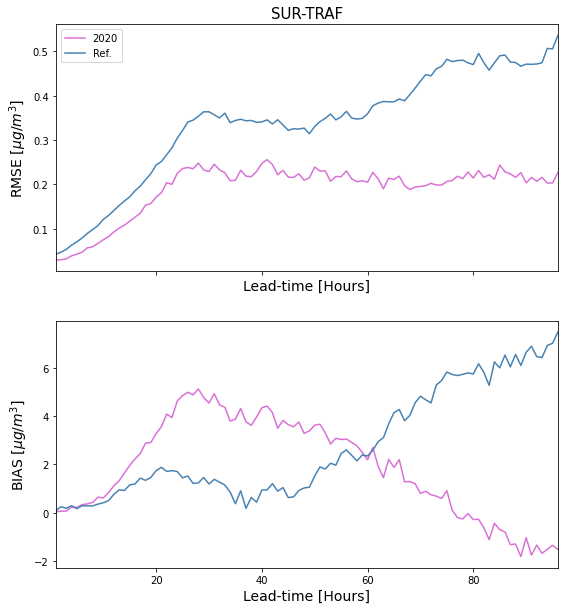

In [178]:
### CARGANDO INFORMACIÓN
#Directorio de entrada
import datetime
dirin_foresta = '/var/data1/AQ_Forecast_DATA/validation_results_addcases/'
dirout_figs = './Figures/'
#Estación
sta = 'SUR-TRAF'

#Periodo de pandemia
TotalValDF_sta_2020 = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2020.csv'.format(sta),
                             parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2020-04-20': '2020-04-30'].reset_index()
#Periodo de referencia
TotalValDF_sta_2021 = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2021.csv'.format(sta),
                             parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2021-04-20': '2021-04-30'].reset_index()

#Creando figura
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18*0.5, 20*0.5), sharex=True)

LsColors = ['orchid', 'steelblue']

#Recorriendo modelos
for idx, model_name in enumerate(['GB_MO']):
    
    #Listas para guardar estadísticos de error
    mae_df, mae_df_ref = [], []
    mape_df, mape_df_ref = [], []
    rmse_df, rmse_df_ref = [], []
    corr_df, corr_df_ref = [], []
    bias_df, bias_df_ref = [], []
    
    #Recorriendo los horizontes
    for i in range(1, 97):
        #Obteniendo info
        DataCov = TotalValDF_sta_2020[TotalValDF_sta_2020.forewindow == i]
        DataRef = TotalValDF_sta_2021[TotalValDF_sta_2021.forewindow == i]
        
        #Calculando estadísticos de covid
        mae_df.append(mean_absolute_error(DataCov['PM2p5'], DataCov[model_name]))
        mape_df.append(mean_absolute_percentage_error(DataCov['PM2p5'], DataCov[model_name]))
        rmse_df.append(np.sqrt(mean_squared_error(DataCov['PM2p5'], DataCov[model_name])))
        corr_df.append(np.corrcoef(DataCov['PM2p5'], DataCov[model_name])[0, 1])
        bias_df.append(np.mean(DataCov[model_name] - DataCov['PM2p5']))
        
        #Calculando estadísticos de ref
        mae_df_ref.append(mean_absolute_error(DataRef['PM2p5'], DataRef[model_name]))
        mape_df_ref.append(mean_absolute_percentage_error(DataRef['PM2p5'], DataRef[model_name]))
        rmse_df_ref.append(np.sqrt(mean_squared_error(DataRef['PM2p5'], DataRef[model_name])))
        corr_df_ref.append(np.corrcoef(DataRef['PM2p5'], DataRef[model_name])[0, 1])
        bias_df_ref.append(np.mean(DataRef[model_name].values - DataRef['PM2p5'].values))
        
    #raise NameError 
    #Graficando RMSE
    if idx == 0:
        ax[0].plot(np.arange(1, 97), mape_df, color=LsColors[0], label='2020')
        ax[0].plot(np.arange(1, 97), mape_df_ref, color=LsColors[1], label='Ref.')
    else:
        ax[0].plot(np.arange(1, 97), mape_df, color=LsColors[0])
        ax[0].plot(np.arange(1, 97), mape_df_ref, color=LsColors[1])
    
    #Graficando BIAS
    ax[1].plot(np.arange(1, 97), bias_df, color=LsColors[0])
    ax[1].plot(np.arange(1, 97), bias_df_ref, color=LsColors[1])
    
#     #colors=['orchid','orchid','steelblue','steelblue','limegreen']
#     #lss = ['solid','--','solid','--','solid','--']
#     for imethod, method in enumerate(['GB_CH','GB_MO','RF_CH','RF_MO','LR_MO']):
#         temp_df = rmse_df[rmse_df['method']==method].iloc[:,:96].dropna()

#     #     for i in range(len(temp_df)):
#     #         plt.plot(temp_df.values[i],color=colors[imethod],alpha=0.05)
#         plt.plot(np.arange(1,97),np.median(temp_df.values,axis=0),
#                  color=colors[imethod],ls=lss[imethod],label=method.replace('_','-'))
#     plt.ylim(0,18)
#     plt.legend(fontsize=12)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)

#     plt.ylabel(r'RMSE [$\mu g / m^3$]',fontsize=14)
#     plt.xlim(1,96)
#     plt.xlabel('Lead-time [Hours]',fontsize=14)
#     plt.title('a)',loc='left',fontsize=14)
#plt.savefig('Figures/RMSE.png',bbox_inches='tight')

ax[0].set_title(sta, fontsize=15)
ax[0].set_ylabel(r'RMSE [$\mu g / m^3$]', fontsize=14)
ax[1].set_ylabel(r'BIAS [$\mu g / m^3$]', fontsize=14)
for idx in range(0, 2):
    ax[idx].set_xlim(1,96)
    ax[idx].set_xlabel('Lead-time [Hours]', fontsize=14)
    #plt.title('a)',loc='left',fontsize=14)

ax[0].legend()
#Guardando y mostrando fig
plt.show()
plt.close()
    

In [157]:
TotalValDF_sta_2020[TotalValDF_sta_2020.forewindow == 1]

date_init   station           date_real  forewindow  \
0     2020-04-20 00:00:00  SUR-TRAF 2020-04-20 01:00:00           1   
96    2020-04-20 01:00:00  SUR-TRAF 2020-04-20 02:00:00           1   
192   2020-04-20 02:00:00  SUR-TRAF 2020-04-20 03:00:00           1   
288   2020-04-20 03:00:00  SUR-TRAF 2020-04-20 04:00:00           1   
384   2020-04-20 04:00:00  SUR-TRAF 2020-04-20 05:00:00           1   
...                   ...       ...                 ...         ...   
24864 2020-04-30 19:00:00  SUR-TRAF 2020-04-30 20:00:00           1   
24960 2020-04-30 20:00:00  SUR-TRAF 2020-04-30 21:00:00           1   
25056 2020-04-30 21:00:00  SUR-TRAF 2020-04-30 22:00:00           1   
25152 2020-04-30 22:00:00  SUR-TRAF 2020-04-30 23:00:00           1   
25248 2020-04-30 23:00:00  SUR-TRAF 2020-05-01 00:00:00           1   

           PM2p5      GB_CH      GB_MO      RF_CH      RF_MO      LR_RC  \
0      16.333333  17.764912  17.764910  25.481293  22.550297  16.243171   
96     17.000000  18.024838  18.024838  24.545335  22.691888  16.395604   
192    17.375000  18.198576  18.198575  25.189412  22.651424  16.855580   
288    18.041667  18.519027  18.519029  24.736473  23.048580  17.038374   
384    18.166667  18.450473  18.450473  24.957325  23.125378  17.444734   
...          ...        ...        ...        ...        ...        ...   
24864  28.333333  28.332236  28.332231  30.225848  28.665046  29.239426   
24960  28.541667  28.179933  28.179935  29.459117  28.570400  28.991993   
25056  27.583333  28.630542  28.630539  29.073086  28.167922  28.707801   
25152  27.416667  27.844440  27.844440  28.814160  28.851364  28.186510   
25248  27.583333  28.771396  28.771398  28.867024  27.199856  27.154899   

           LR_MO  
0      16.862646  
96     17.052074  
192    17.504643  
288    17.633414  
384    17.950645  
...          ...  
24864  29.169354  
24960  29.092316  
25056  28.984134  
25152  28.602429  
25248  27.679718  

[264 rows x 11 columns]

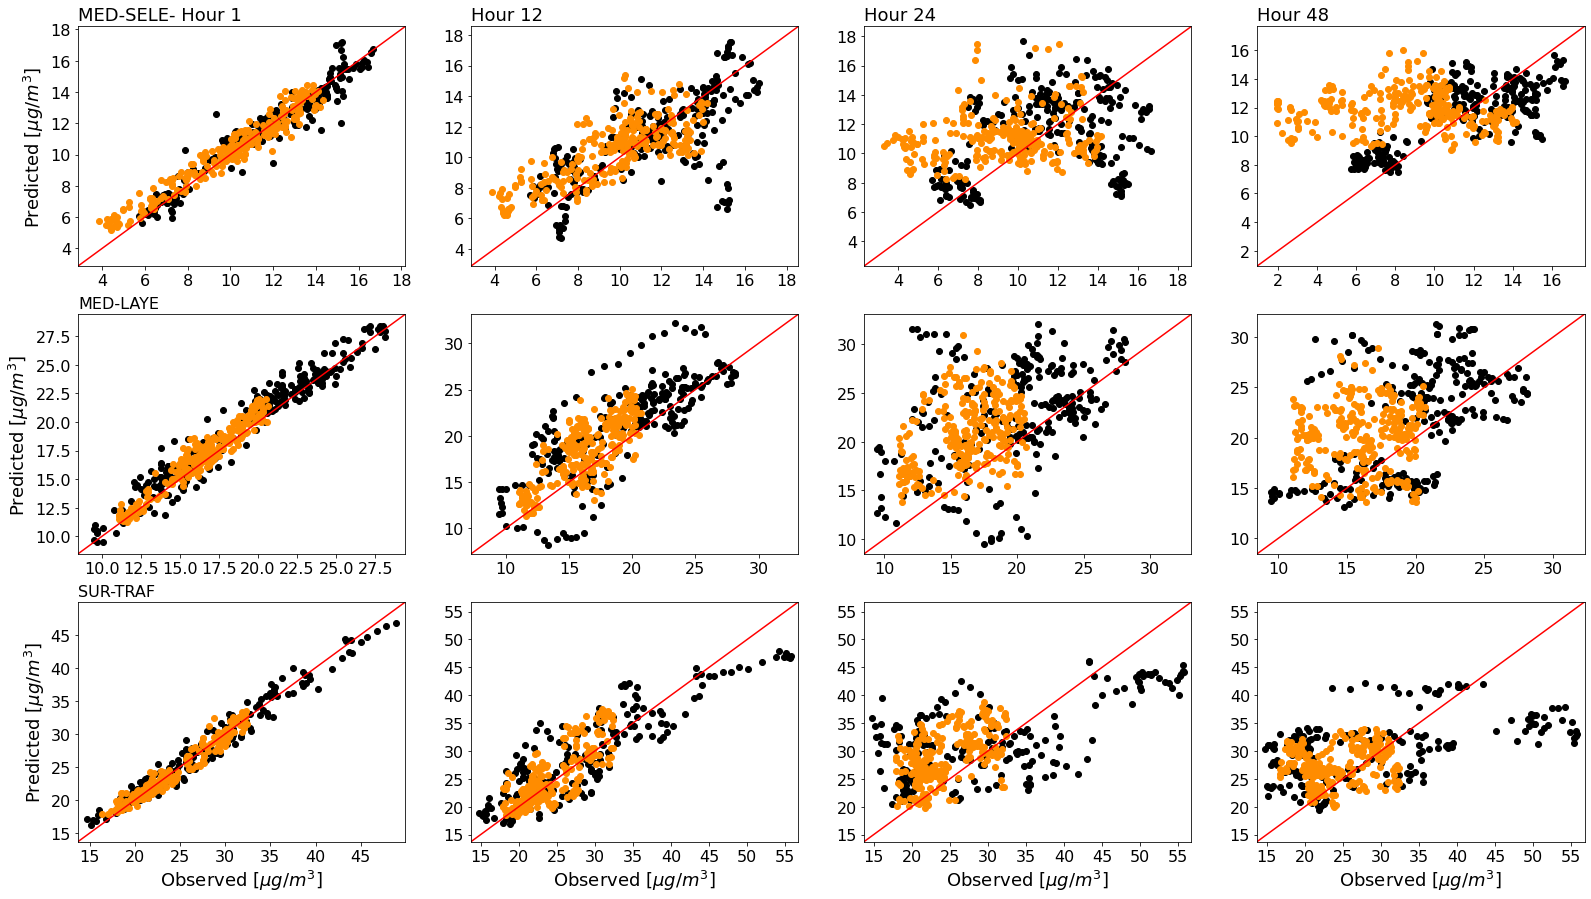

In [179]:
fig = plt.figure(figsize=(27,15))

for istation,station in enumerate(['MED-SELE','MED-LAYE','SUR-TRAF']):
    
    #Periodo de pandemia
    TotalValDF_sta_2020 = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2020.csv'.format(station),
                                 parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2020-04-20': '2020-04-30'].reset_index()
    #Periodo de referencia
    TotalValDF_sta_2021 = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2021.csv'.format(station),
                                 parse_dates=['date_init', 'date_real'], index_col='date_init').loc['2021-04-20': '2021-04-30'].reset_index()

#     print(station)
#     X = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_X.npy',allow_pickle=True)
#     Y_validation = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_Y_validation.npy',allow_pickle=True)
#     dates = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_dates.npy',allow_pickle=True)
#     scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
#     scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')
#     X_scaled = scaler_x.transform(X)

#     model_name = 'GB_MO'
#     estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
#     Y_predicted_scaled = estimator_temp.predict(X_scaled)
#     Y_predicted = scaler_y.inverse_transform(Y_predicted_scaled)

    for i,leadtime in enumerate([1,12,24,48]):
        #Obteniendo info
        DataCov = TotalValDF_sta_2020[TotalValDF_sta_2020.forewindow == leadtime]
        DataRef = TotalValDF_sta_2021[TotalValDF_sta_2021.forewindow == leadtime]
        
        #Graficando
        
        ax = fig.add_subplot(3,4,(i+1)+istation*4)
        ax.scatter(DataRef['PM2p5'], DataRef['GB_MO'], color='k')
        ax.scatter(DataCov['PM2p5'], DataCov['GB_MO'], color='darkorange')
        ax.plot([0,100],[0,100],color='red')
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        if (istation==0)&(i>0):
            plt.title(['Hour 12','Hour 24','Hour 48'][i-1],fontsize=18,loc='left')
        if i%4==0:
            if istation==0:
                plt.title(station + '- Hour 1',fontsize=18,loc='left')
            else:
                plt.title(station,fontsize=16,loc='left')
            plt.ylabel(r'Predicted [$\mu g / m^3$]',fontsize=18)
        if istation==2:
            plt.xlabel(r'Observed [$\mu g / m^3$]',fontsize=18)
            
#         ax.set_ylim(5, 60)
#         ax.set_xlim(5, 60)
            
        ax.set_ylim(np.concatenate([DataRef['PM2p5'].values, DataRef['GB_MO'].values, DataCov['PM2p5'].values, DataCov['GB_MO'].values]).min()-1
                    ,np.concatenate([DataRef['PM2p5'].values, DataRef['GB_MO'].values, DataCov['PM2p5'].values, DataCov['GB_MO'].values]).max()+1)
        ax.set_xlim(np.concatenate([DataRef['PM2p5'].values, DataRef['GB_MO'].values, DataCov['PM2p5'].values, DataCov['GB_MO'].values]).min()-1
                    ,np.concatenate([DataRef['PM2p5'].values, DataRef['GB_MO'].values, DataCov['PM2p5'].values, DataCov['GB_MO'].values]).max()+1)

In [95]:
TotalValDF_sta

station  date_init           date_real  forewindow      PM2p5  \
0       SUR-TRAF 2021-02-02 2021-02-02 01:00:00           1  24.166667   
1       SUR-TRAF 2021-02-02 2021-02-02 02:00:00           2  24.208333   
2       SUR-TRAF 2021-02-02 2021-02-02 03:00:00           3  23.458333   
3       SUR-TRAF 2021-02-02 2021-02-02 04:00:00           4  23.416667   
4       SUR-TRAF 2021-02-02 2021-02-02 05:00:00           5  22.958333   
...          ...        ...                 ...         ...        ...   
168379  SUR-TRAF 2021-04-30 2021-05-03 20:00:00          92  14.166667   
168380  SUR-TRAF 2021-04-30 2021-05-03 21:00:00          93  14.166667   
168381  SUR-TRAF 2021-04-30 2021-05-03 22:00:00          94  14.625000   
168382  SUR-TRAF 2021-04-30 2021-05-03 23:00:00          95  15.000000   
168383  SUR-TRAF 2021-04-30 2021-05-04 00:00:00          96  15.416667   

            GB_CH      GB_MO      RF_CH      RF_MO      LR_RC      LR_MO  
0       25.826338  27.505091  32.502762  28.747600  25.358586  25.358586  
1       24.751710  25.137736  33.624745  27.823057  24.141264  24.141264  
2       24.626825  24.541475  31.903657  27.473191  21.875166  21.875166  
3       25.358592  26.747607  34.390897  26.859507  20.066173  20.066173  
4       25.302327  25.975463  31.467959  26.830192  19.237296  19.237296  
...           ...        ...        ...        ...        ...        ...  
168379  28.210091  25.356312  26.421813  29.826785   5.222210   5.222210  
168380  28.639157  26.394519  27.085629  28.877320   6.990036   6.990036  
168381  28.830427  26.640472  26.629637  27.458298  10.382418  10.382418  
168382  29.290845  26.258888  27.053415  29.740311  13.626452  13.626452  
168383  29.297624  27.173508  26.830583  27.842090  15.111676  15.111676  

[168384 rows x 11 columns]

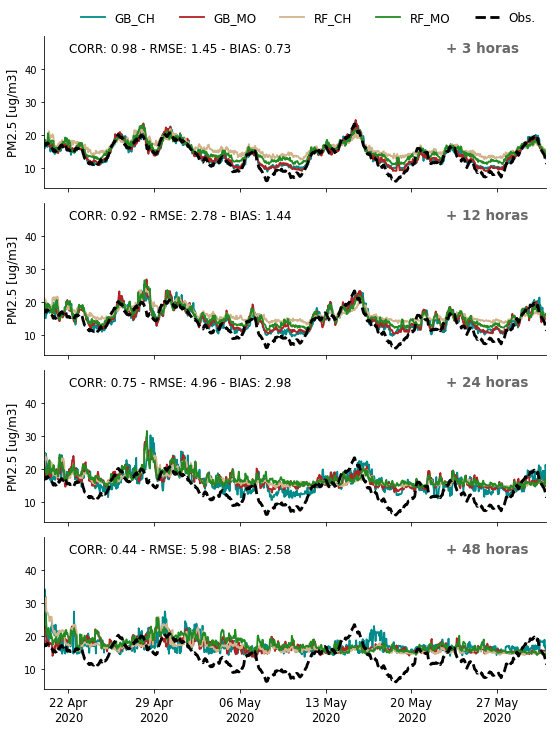

In [89]:
#Directorio de entrada
import datetime
dirin_foresta = '/var/data1/AQ_Forecast_DATA/validation_results_addcases/'
dirout_figs = './Figures/'

#Cargando información
TotalValDF_sta = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2020.csv'.format('MED-LAYE'),
                             parse_dates=['date_init', 'date_real'])


#Creando figura
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(9, 12), sharex=True, sharey=True)
ArrAxes = ax.reshape(-1)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

#Colores a graficar
LsColors = ['darkcyan', 'firebrick', 'tan', 'forestgreen']
LsModels_plot = ['GB_CH', 'GB_MO', 'RF_CH', 'RF_MO']

#Recorriendo horizontes de pronóstico
for idx, fore_horiz in enumerate([3, 12, 24, 48]):
    
    jdx=0 #Para variar colores
    #Recorrer modelos
    for model in LsModels_plot + ['PM2p5']:
        #Obteniendo este conjunto de datos
        DataModel_plot = TotalValDF_sta[TotalValDF_sta.forewindow == fore_horiz][['date_real', model]].copy()
        #Para graficar Nan en la serie de tiempo:
        DataModel_plot = DataModel_plot.set_index('date_real').resample('1H').first().reset_index()
        #raise NameError
        #YA ESTÁ HECHO!! Obteniendo media móvil de 24 horas
        #DataModel_plot[model] = DataModel_plot[model].rolling(24).mean()
        
        #Graficando información
        if model not in ['PM2p5']:
            ArrAxes[idx].plot(DataModel_plot['date_real'], DataModel_plot[model], alpha=1,
                         linewidth=1.8, label=model, color=LsColors[jdx])
            jdx += 1 #Para colores
        else:
            ArrAxes[idx].plot(DataModel_plot['date_real'], DataModel_plot[model], alpha=1,
                         linewidth=2.8, linestyle='--', color='black', label='Obs.', zorder=10)
    
    #Parámetros para los Axes
    #Removiendo límites de los ejes
    ArrAxes[idx].spines['top'].set_visible(False)
    ArrAxes[idx].spines['right'].set_visible(False)
    #Límites en X
    ArrAxes[idx].set_xlim([datetime.date(2020, 4, 20), datetime.date(2020, 5, 31)])
    #Ticks
    Dates = pd.date_range('2020-04-20 00:00', '2020-05-31 00:00', freq='H')
    ArrAxes[idx].set_xticks(Dates[48::168])
    ArrAxes[idx].set_xticklabels(Dates.strftime('%d %b\n%Y')[48::168], fontsize=11.5)
    
    #Agregando label eje Y
    if idx in [0, 1, 2]:
        ArrAxes[idx].set_ylabel('PM2.5 [ug/m3]', fontsize=12)
        
    #Añadiendo texto con lead time
    ArrAxes[idx].text(0.8, 0.92, '+ {0} horas'.format(fore_horiz), fontsize=13.5, weight='bold',
                      verticalalignment='center', horizontalalignment='left', color='dimgray',
                      transform=ArrAxes[idx].transAxes)
    
    #Añadiendo texto con métricas de error para el mejor modelo
    #Obteniendo información
    Observed = TotalValDF_sta[TotalValDF_sta.forewindow == fore_horiz]['PM2p5'].values
    Forecast = TotalValDF_sta[TotalValDF_sta.forewindow == fore_horiz]['GB_MO'].values
    #Calculando métricas
    CORR = np.corrcoef(Forecast, Observed)[0, 1]
    RMSE = np.sqrt(np.mean((Forecast - Observed)**2))
    BIAS = np.mean(Forecast - Observed)
    
    #Añadiendo errores con lead time
    ArrAxes[idx].text(0.05, 0.92, 'CORR: {0:.2f} - RMSE: {1:.2f} - BIAS: {2:.2f}'.format(CORR, RMSE, BIAS),
                      fontsize=12, verticalalignment='center', horizontalalignment='left', color='black',
                      transform=ArrAxes[idx].transAxes)

    
#Añadiendo leyenda
ArrAxes[0].legend(loc='lower right', bbox_to_anchor=(1.,1.01), ncol=8, fontsize=12, edgecolor='white')

#Guardando y cerrando figura
#plt.savefig(dirout_figs + 'Fig_SeriesByLeadtime_Stats.jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


## Versión 2 (suavizando)

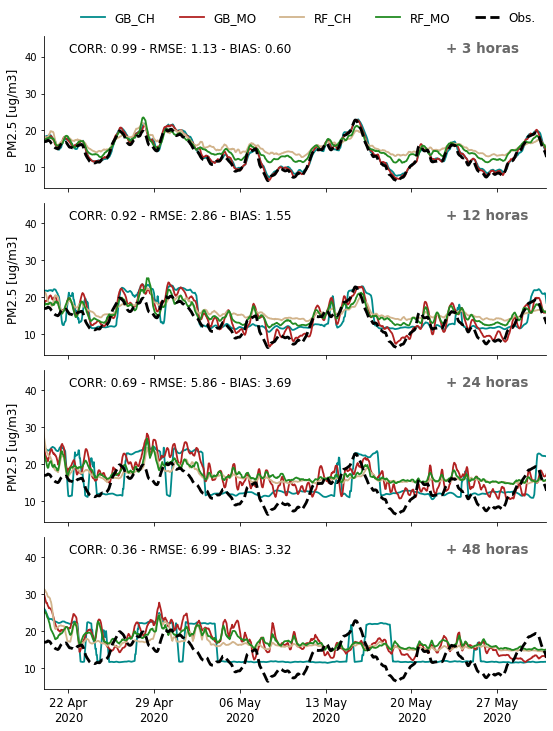

In [180]:
#Directorio de entrada
import datetime
dirin_foresta = '/var/data1/AQ_Forecast_DATA/validation_results_addcases/'
dirout_figs = './Figures/'

#Cargando información
TotalValDF_sta = pd.read_csv(dirin_foresta + 'TotalVal_{0}_2020.csv'.format('MED-LAYE'),
                             parse_dates=['date_init', 'date_real'])


#Creando figura
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(9, 12), sharex=True, sharey=True)
ArrAxes = ax.reshape(-1)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

#Colores a graficar
LsColors = ['darkcyan', 'firebrick', 'tan', 'forestgreen']
LsModels_plot = ['GB_CH', 'GB_MO', 'RF_CH', 'RF_MO']

#Recorriendo horizontes de pronóstico
for idx, fore_horiz in enumerate([3, 12, 24, 48]):
    
    jdx=0 #Para variar colores
    #Recorrer modelos
    for model in LsModels_plot + ['PM2p5']:
        #Obteniendo este conjunto de datos
        DataModel_plot = TotalValDF_sta[TotalValDF_sta.forewindow == fore_horiz][['date_real', model]].copy()
        #Para graficar Nan en la serie de tiempo:
        DataModel_plot = DataModel_plot.set_index('date_real').resample('1H').first().reset_index()
        #raise NameError
        #YA ESTÁ HECHO!! Obteniendo media móvil de 24 horas
        DataModel_plot[model] = DataModel_plot[model].rolling(6).mean()
        
        #Graficando información
        if model not in ['PM2p5']:
            ArrAxes[idx].plot(DataModel_plot['date_real'], DataModel_plot[model], alpha=1,
                         linewidth=1.8, label=model, color=LsColors[jdx])
            jdx += 1 #Para colores
        else:
            ArrAxes[idx].plot(DataModel_plot['date_real'], DataModel_plot[model], alpha=1,
                         linewidth=2.8, linestyle='--', color='black', label='Obs.', zorder=10)
    
    #Parámetros para los Axes
    #Removiendo límites de los ejes
    ArrAxes[idx].spines['top'].set_visible(False)
    ArrAxes[idx].spines['right'].set_visible(False)
    #Límites en X
    ArrAxes[idx].set_xlim([datetime.date(2020, 4, 20), datetime.date(2020, 5, 31)])
    #Ticks
    Dates = pd.date_range('2020-04-20 00:00', '2020-05-31 00:00', freq='H')
    ArrAxes[idx].set_xticks(Dates[48::168])
    ArrAxes[idx].set_xticklabels(Dates.strftime('%d %b\n%Y')[48::168], fontsize=11.5)
    
    #Agregando label eje Y
    if idx in [0, 1, 2]:
        ArrAxes[idx].set_ylabel('PM2.5 [ug/m3]', fontsize=12)
        
    #Añadiendo texto con lead time
    ArrAxes[idx].text(0.8, 0.92, '+ {0} horas'.format(fore_horiz), fontsize=13.5, weight='bold',
                      verticalalignment='center', horizontalalignment='left', color='dimgray',
                      transform=ArrAxes[idx].transAxes)
    
    #Añadiendo texto con métricas de error para el mejor modelo
    #Obteniendo información
    Observed = TotalValDF_sta[TotalValDF_sta.forewindow == fore_horiz]['PM2p5'].values
    Forecast = TotalValDF_sta[TotalValDF_sta.forewindow == fore_horiz]['GB_MO'].values
    #Calculando métricas
    CORR = np.corrcoef(Forecast, Observed)[0, 1]
    RMSE = np.sqrt(np.mean((Forecast - Observed)**2))
    BIAS = np.mean(Forecast - Observed)
    
    #Añadiendo errores con lead time
    ArrAxes[idx].text(0.05, 0.92, 'CORR: {0:.2f} - RMSE: {1:.2f} - BIAS: {2:.2f}'.format(CORR, RMSE, BIAS),
                      fontsize=12, verticalalignment='center', horizontalalignment='left', color='black',
                      transform=ArrAxes[idx].transAxes)

    
#Añadiendo leyenda
ArrAxes[0].legend(loc='lower right', bbox_to_anchor=(1.,1.01), ncol=8, fontsize=12, edgecolor='white')

#Guardando y cerrando figura
#plt.savefig(dirout_figs + 'Fig_SeriesByLeadtime_Stats.jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## Distribuciones pronosticadas y observadas

Distribuciones de valores pronósticados y observados para diferentes umbrales!! (esto es para mostrar si hay algún BIAS)... Y comparar con el otro periodo de evaluación (hacerlo para una estación en particular)

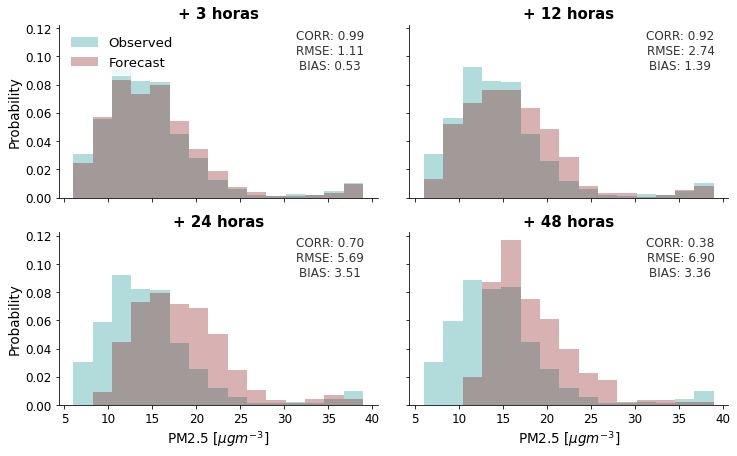

In [150]:
from matplotlib.ticker import FormatStrFormatter

#Graficando
fig, ax=plt.subplots(figsize=(12, 7), nrows=2, ncols=2, sharey=True, sharex=True)
fig.subplots_adjust(wspace=0.1, hspace=0.2)

#Parámetros para la figura
#List_letters=['A', 'B', 'C', 'D']
Horizons = [3, 12, 24, 48]

#Recorriendo los paneles
for idx, fore_horiz in enumerate(Horizons):
    #Cargando información
    DF_obs = TotalValDF_sta[TotalValDF_sta.forewindow == fore_horiz].PM2p5.values
    DF_for = TotalValDF_sta[TotalValDF_sta.forewindow == fore_horiz].GB_MO.values

    #Graficando
    n1, bins1, patches1 = ax.flatten()[idx].hist(DF_obs, density=True, alpha=0.3, color='darkcyan', label='Observed', bins=15)
    n2, bins2, patches2 = ax.flatten()[idx].hist(DF_for, density=True, alpha=0.3, color='maroon', bins=bins1, label='Forecast')

    #Calculando coeficiente
    #ovlp = np.sum(np.abs(n1*np.diff(bins1)-n2*np.diff(bins2)))
    ovlp = np.sum(np.abs(n1* np.diff(bins1)- n2 * np.diff(bins2))) / 2
    #ovlp = np.sum(np.abs(n1-n2))
    #From matplotlib page: so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).

    #Obteniendo p value
    #pvalue_mannwhit=mannwhitneyu(DF_filter, DF_total)[1]  #Test de Mann-Whitney U

    #Añadiendo titulos
    # if pvalue_mannwhit < 0.025:
    #   if pvalue_mannwhit < 0.005:
    #     ax.flatten()[idx].text(0.8, 0.92, 'p<0.01\nOverlap: {0:.2f}'.format(ovlp), horizontalalignment='center', fontsize=12,
    #                       verticalalignment='center', transform=ax.flatten()[idx].transAxes)
    #     #ax.flatten()[idx].set_title('p<0.01   -   Overlap: {0:.2f}'.format(ovlp), fontsize=13)
    #   elif pvalue_mannwhit < 0.01:
    #     ax.flatten()[idx].text(0.8, 0.92, 'p<0.01\nOverlap: {0:.2f}'.format(ovlp), horizontalalignment='center', fontsize=12,
    #                       verticalalignment='center', transform=ax.flatten()[idx].transAxes)
    #   else:
    #     ax.flatten()[idx].text(0.8, 0.92, 'p<0.01\nOverlap: {0:.2f}'.format(ovlp), horizontalalignment='center', fontsize=12,
    #                       verticalalignment='center', transform=ax.flatten()[idx].transAxes)
    # else:
    #   ax.flatten()[idx].text(0.8, 0.92, 'p<0.01\nOverlap: {0:.2f}'.format(ovlp), horizontalalignment='center', fontsize=12,
    #                     verticalalignment='center', transform=ax.flatten()[idx].transAxes)

    #Añadiendo título
    ax.flatten()[idx].set_title('+ {0} horas'.format(fore_horiz), fontsize=15, weight='bold')
    # ax.flatten()[idx].text(0.09, 0.92, '+ {0} horas'.format(fore_horiz), horizontalalignment='center', fontsize=21, weight='bold',
    #                         verticalalignment='center', transform=ax.flatten()[idx].transAxes)

    #Obteniendo información
    Observed = TotalValDF_sta[TotalValDF_sta.forewindow == fore_horiz]['PM2p5'].values
    Forecast = TotalValDF_sta[TotalValDF_sta.forewindow == fore_horiz]['GB_MO'].values
    #Añadiendo estadísticos
    CORR = np.corrcoef(Forecast, Observed)[0, 1]
    RMSE = np.sqrt(np.mean((Forecast - Observed)**2))
    BIAS = np.mean(Forecast - Observed)

    #Añadiendo errores con lead time
    # ax.flatten()[idx].text(0.05, 0.92, 'CORR: {0:.2f} - RMSE: {1:.2f} - BIAS: {2:.2f}'.format(CORR, RMSE, BIAS),
    #                   fontsize=12, verticalalignment='center', horizontalalignment='left', color='black',
    #                   transform=ax.flatten()[idx].transAxes)
    ax.flatten()[idx].text(0.85, 0.85, 'CORR: {0:.2f}\nRMSE: {1:.2f}\nBIAS: {2:.2f}'.format(CORR, RMSE, BIAS),
                    fontsize=12, verticalalignment='center', horizontalalignment='center', color='black',
                    transform=ax.flatten()[idx].transAxes, alpha=0.8)

    #Otros parámetros
    ax.flatten()[idx].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    if idx in [0, 2]:
        ax.flatten()[idx].set_ylabel('Probability', fontsize=13.5)
    if idx in [2, 3]:
        ax.flatten()[idx].set_xlabel('PM2.5 $[\mu g m^{-3}]$', fontsize=13.5)

    #Tamaño de los ticks
    ax.flatten()[idx].tick_params(axis='both', labelsize=12)

    #Removiendo bordes derecho y superior de la figura
    ax.flatten()[idx].spines['right'].set_visible(False)
    ax.flatten()[idx].spines['top'].set_visible(False)

    #print(List_letters[idx], key)

#Añadiendo leyenda en el último axes
# ax.flatten()[1].legend(loc='lower right', bbox_to_anchor=(1., 1.1),
#                         ncol=2, fontsize=13.5, edgecolor='white')
ax.flatten()[0].legend(loc='upper left', ncol=1, fontsize=13.4, edgecolor='white')

#Guardando y cerrando la figura
#plt.savefig(dirout_figs + 'Fig_MaximumPrecipitation_OLRWaves.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [10]:
DataModel_plot

date_real      GB_CH
2     2022-03-15 03:00:00  23.821059
98    2022-03-15 04:00:00  24.260331
194   2022-03-15 05:00:00  24.455738
290   2022-03-15 06:00:00  25.598033
386   2022-03-15 07:00:00  26.085450
...                   ...        ...
32642 2022-03-30 23:00:00  30.169240
32738 2022-03-31 00:00:00  30.328095
32834 2022-03-31 01:00:00  29.867818
32930 2022-03-31 02:00:00  30.611350
33026 2022-03-31 03:00:00  30.300581

[345 rows x 2 columns]

In [ ]:
#Cargar datos (estación particular)
#Tomar código previo
#Montar evaluación (como se planteó!!)


# ----------- OLD -------------- !!

# Collect Info

In [28]:
gfs_path = '/var/data1/AQ_Forecast_DATA/historic/GFS/validation_rev1/'
cams_path = '/var/data1/AQ_Forecast_DATA/historic/CAMS/Pronostico/'
path_IFRP ="/var/data1/AQ_Forecast_DATA/historic/Fires/IFRP_Validation_rev1/"
files_ifrp = np.sort(glob.glob(path_IFRP+'*'))
dates_ifrp = np.array([dt.datetime.strptime(files_ifrp[i].split('/')[-1][:-4],'%Y%m%d%H')\
    for i in range(len(files_ifrp))])

In [29]:
stations = ["ITA-CJUS", "CAL-LASA", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
            "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
            "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]
stations = ["ITA-CJUS", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
            "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
            "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]

coor_esta= pd.read_csv("/var/data1/AQ_Forecast_DATA/historic/PM25/CoordenadasEstaciones.csv", index_col= "Nombre")

for station in stations[4:]:
    print(station)
    lat_est = coor_esta.loc[station].Latitud
    lon_est = coor_esta.loc[station].Longitud

    date_start_validation = dt.datetime(2022,3,15,0)
    date_end_validation = dt.datetime(2022,3,31,0)
    dates_start_forecast = pd.date_range(date_start_validation,date_end_validation,freq = '1H')
    df_pm2p5_full = get_pm2p5_period(dates_start_forecast[0]-dt.timedelta(hours=200),
                                         dates_start_forecast[-1]+dt.timedelta(hours=200),station_name = station)
    
    dates = []
    X = []
    Y_validation = []

    for i in range(len(dates_start_forecast)):
#     for i in range(200):
    # for i in [2000]:
        if i%100==0:
            print(i)

        # ### Initial date of forecast ###
        forecast_initial_date = dates_start_forecast[i]

        ### Get future and past PM2.5 ### Change rolling window here
        pm_validation_temp = df_pm2p5_full.rolling(24,min_periods=16).mean()[forecast_initial_date:\
            forecast_initial_date+dt.timedelta(hours = 95)]

        max_lag = 48 ## Maximum lag used
        x_shifts = pd.concat([df_pm2p5_full['PM2.5'].shift(i) for i in range(max_lag,0,-1)],axis = 1).dropna()
        x_shifts.columns = (-np.arange(max_lag,0,-1)).astype(str)

        ### Get GFS and CAMS ###
        df_GFS,df_optimal_gfs = get_gfs_for_forecast(forecast_initial_date,\
            gfs_path,operational = False,latlon = (lat_est,lon_est))
        df_CAMS,df_optimal_cams = get_cams_for_forecast(forecast_initial_date,\
            cams_path,operational = False,latlon = (lat_est,lon_est))

        ### Get IFRP
        file_ifrp = files_ifrp[dates_ifrp<=forecast_initial_date.to_pydatetime()+\
                   dt.timedelta(hours=5)-dt.timedelta(hours=10)][-1]
        df_IFRP = pd.read_csv(file_ifrp,index_col=1,parse_dates=True)[['IFRP']]
        df_IFRP.index = df_IFRP.index-dt.timedelta(hours=5)

        ### Select inputs for forecasting

        index_future = pm_validation_temp.index
        try:
            x_shifts_temp = x_shifts.loc[forecast_initial_date].values
        except:
            print('x_shifts Failed - i='+str(i))
            continue
        try:
            cams_future = df_optimal_cams.loc[index_future[0]:].iloc[np.arange(0,97,3),:]
        except:
            print('CAMS Failed - i='+str(i))
            continue
        aod_future = cams_future['aod'].values
        bc_future = cams_future['bcaod'].values
        pm2p5_future = cams_future['pm2p5_cams'].values
        try:
            gfs_future = df_optimal_gfs.loc[index_future[0]:].iloc[np.arange(0,97,3),:]
        except:
            print('GFS Failed - i='+str(i))
            continue
        tcc_future = gfs_future['tcc'].values
        rad_future = gfs_future['rad'].values
        prate_future = gfs_future['prate'].values
        hpbl_future = gfs_future['hpbl'].values
        cin_future = gfs_future['cin'].values
        try:
            ifrp50_future = df_IFRP.rolling(3,center=True).max().loc[index_future[0]:].iloc[np.arange(0,97,3),0].values
        except:
            print('IFRP Failed - i='+str(i))
            continue
        df_hour = pd.DataFrame(pm_validation_temp.index.hour, index = pm_validation_temp.index)
        hod1_future = np.sin(2*np.pi*(df_hour/24)).iloc[np.arange(0,24,1),0].values
        hod2_future = np.cos(2*np.pi*(df_hour/24)).iloc[np.arange(0,24,1),0].values

        df_dow = pd.DataFrame(pm_validation_temp.index.dayofweek, index = pm_validation_temp.index)
        dow1_future = np.sin(2*np.pi*(df_dow/7)).iloc[np.arange(0,96,24),0].values
        dow2_future = np.cos(2*np.pi*(df_dow/7)).iloc[np.arange(0,96,24),0].values

        x_temp = np.hstack([x_shifts_temp,
            aod_future,
        #     bc_future,
        #     pm2p5_future,
            tcc_future,
        #     rad_future,
            prate_future,
            hpbl_future,
        #     cin_future,
            ifrp50_future,
            dow1_future,
            dow2_future,
            hod1_future,
            hod2_future])

        y_temp = pm_validation_temp.values[:,0]
        if (len(y_temp[np.isfinite(y_temp)==False])==0)&(len(x_temp[np.isfinite(x_temp)==False])==0):
            X.append(x_temp)
            Y_validation.append(y_temp)

            dates.append(forecast_initial_date)
    X = np.array(X)
    Y_validation = np.array(Y_validation)
    dates = np.array(dates)
    
    np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2022_X',X)
    np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2022_Y_validation',Y_validation)
    np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2022_dates',dates)


EST-HOSP
0
100
IFRP Failed - i=104
IFRP Failed - i=105
IFRP Failed - i=106
IFRP Failed - i=107
GFS Failed - i=108
GFS Failed - i=109
GFS Failed - i=110
GFS Failed - i=111
GFS Failed - i=112
GFS Failed - i=113
GFS Failed - i=114
GFS Failed - i=115
GFS Failed - i=116
GFS Failed - i=117
GFS Failed - i=118
GFS Failed - i=119
GFS Failed - i=120
GFS Failed - i=121
GFS Failed - i=122
IFRP Failed - i=123
IFRP Failed - i=124
CAMS Failed - i=164
CAMS Failed - i=165
CAMS Failed - i=166
CAMS Failed - i=167
CAMS Failed - i=168
CAMS Failed - i=169
CAMS Failed - i=170
CAMS Failed - i=171
CAMS Failed - i=172
200
300
CAMS Failed - i=368
CAMS Failed - i=369
CAMS Failed - i=370
CAMS Failed - i=371
CAMS Failed - i=372
CAMS Failed - i=373
CAMS Failed - i=374
CAMS Failed - i=375
CAMS Failed - i=376
MED-ALTA
0
100
IFRP Failed - i=104
IFRP Failed - i=105
IFRP Failed - i=106
IFRP Failed - i=107
GFS Failed - i=108
GFS Failed - i=109
GFS Failed - i=110
GFS Failed - i=111
GFS Failed - i=112
GFS Failed - i=113
GFS

In [31]:
stations = ["ITA-CJUS", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
            "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
            "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]
stations = ["EST-HOSP", "MED-ALTA", "MED-VILL",
            "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
            "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]

coor_esta= pd.read_csv("/var/data1/AQ_Forecast_DATA/historic/PM25/CoordenadasEstaciones.csv", index_col= "Nombre")

methods_df = []
stations_df = []
mae_df = []
mape_df = []
rmse_df = []
corr_df = []

for station in stations:
    print(station)
    X = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2022_X.npy',allow_pickle=True)
    Y_validation = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2022_Y_validation.npy',allow_pickle=True)
    dates = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2022_dates.npy',allow_pickle=True)
    scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
    scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')
    X_scaled = scaler_x.transform(X)

    for model_name in ['GB_CH','GB_MO','RF_CH','RF_MO','LR_RC','LR_MO']:
        print(model_name)
        try:
            estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
            Y_predicted_scaled = estimator_temp.predict(X_scaled)
            Y_predicted = scaler_y.inverse_transform(Y_predicted_scaled)
            np.save('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_2022_Y_predicted',Y_predicted)
            methods_df.append(model_name)
            stations_df.append(station)
            mae_df.append([mean_absolute_error(Y_validation[:,i],Y_predicted[:,i]) for i in range(96)])
            mape_df.append([mean_absolute_percentage_error(Y_validation[:,i],Y_predicted[:,i]) for i in range(96)])
            rmse_df.append([np.sqrt(mean_squared_error(Y_validation[:,i],Y_predicted[:,i])) for i in range(96)])
            corr_df.append([np.corrcoef(Y_validation[:,i],Y_predicted[:,i])[0,1] for i in range(96)])
        except:
            methods_df.append(model_name)
            stations_df.append(station)
            mae_df.append([np.nan for i in range(96)])
            mape_df.append([np.nan for i in range(96)])
            rmse_df.append([np.nan for i in range(96)])
            corr_df.append([np.nan for i in range(96)])

EST-HOSP
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-ALTA
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-VILL
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
BAR-TORR
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
COP-CVID
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-BEME
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-TESO
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-SCRI
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-ARAN
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
BEL-FEVE
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
ENV-HOSP
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
SAB-RAME
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
MED-SELE
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
CEN-TRAF
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO
SUR-TRAF
GB_CH
GB_MO
RF_CH
RF_MO
LR_RC
LR_MO


In [32]:
estimator_temp

MultiOutputRegressor(estimator=LinearRegression(n_jobs=1), n_jobs=1)

In [33]:
mae_df = pd.DataFrame(np.array(mae_df))
mae_df['station'] = stations_df
mae_df['method'] = methods_df

mape_df = pd.DataFrame(np.array(mape_df))
mape_df['station'] = stations_df
mape_df['method'] = methods_df

rmse_df = pd.DataFrame(np.array(rmse_df))
rmse_df['station'] = stations_df
rmse_df['method'] = methods_df

corr_df = pd.DataFrame(np.array(corr_df))
corr_df['station'] = stations_df
corr_df['method'] = methods_df

In [34]:
#mae_df.to_csv('/var/data1/AQ_Forecast_DATA/validation_results/MAE.csv')
#mape_df.to_csv('/var/data1/AQ_Forecast_DATA/validation_results/MAPE.csv')
#rmse_df.to_csv('/var/data1/AQ_Forecast_DATA/validation_results/RMSE.csv')
#corr_df.to_csv('/var/data1/AQ_Forecast_DATA/validation_results/CORR.csv')

Text(0.0, 1.0, 'a)')

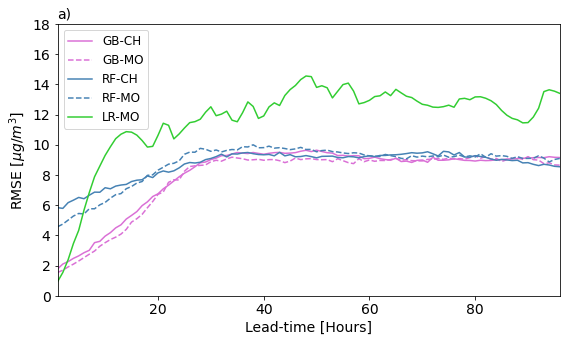

In [35]:
plt.figure(figsize=(9,5))

colors=['orchid','orchid','steelblue','steelblue','limegreen']
lss = ['solid','--','solid','--','solid','--']
for imethod,method in enumerate(['GB_CH','GB_MO','RF_CH','RF_MO','LR_MO']):
    temp_df = rmse_df[rmse_df['method']==method].iloc[:,:96].dropna()
    
#     for i in range(len(temp_df)):
#         plt.plot(temp_df.values[i],color=colors[imethod],alpha=0.05)
    plt.plot(np.arange(1,97),np.median(temp_df.values,axis=0),
             color=colors[imethod],ls=lss[imethod],label=method.replace('_','-'))
plt.ylim(0,18)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel(r'RMSE [$\mu g / m^3$]',fontsize=14)
plt.xlim(1,96)
plt.xlabel('Lead-time [Hours]',fontsize=14)
plt.title('a)',loc='left',fontsize=14)
#plt.savefig('Figures/RMSE.png',bbox_inches='tight')

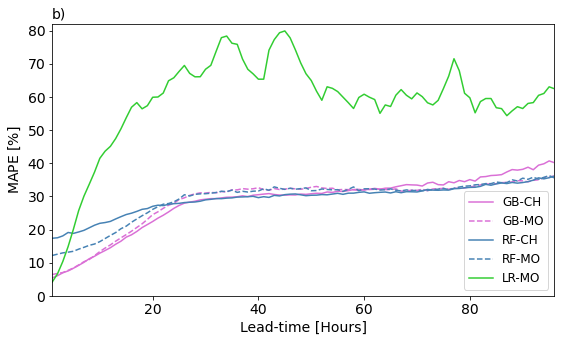

In [17]:
plt.figure(figsize=(9,5))

colors=['orchid','orchid','steelblue','steelblue','limegreen']
lss = ['solid','--','solid','--','solid','--']
for imethod,method in enumerate(['GB_CH','GB_MO','RF_CH','RF_MO','LR_MO']):
    temp_df = mape_df[rmse_df['method']==method].iloc[:,:96].dropna()
    
#     for i in range(len(temp_df)):
#         plt.plot(temp_df.values[i],color=colors[imethod],alpha=0.05)
    plt.plot(np.arange(1,97),np.median(temp_df.values,axis=0)*100,
             color=colors[imethod],ls=lss[imethod],label=method.replace('_','-'))
plt.ylim(0,82)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel(r'MAPE [$\%$]',fontsize=14)
plt.xlim(1,96)
plt.xlabel('Lead-time [Hours]',fontsize=14)
plt.title('b)',loc='left',fontsize=14)
#plt.savefig('Figures/MAPE.png',bbox_inches='tight')

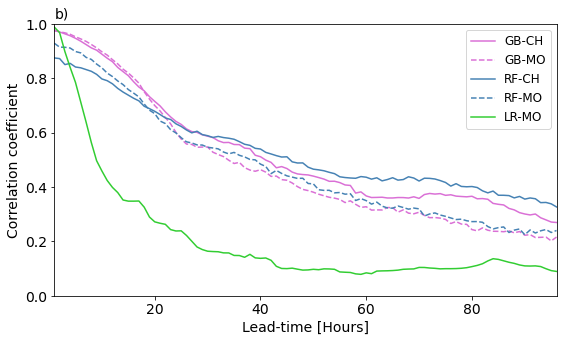

In [18]:
plt.figure(figsize=(9,5))

colors=['orchid','orchid','steelblue','steelblue','limegreen']
lss = ['solid','--','solid','--','solid','--']
for imethod,method in enumerate(['GB_CH','GB_MO','RF_CH','RF_MO','LR_MO']):
    temp_df = corr_df[corr_df['method']==method].iloc[:,:96].dropna()
    
#     for i in range(len(temp_df)):
#         plt.plot(temp_df.values[i],color=colors[imethod],alpha=0.05)
    plt.plot(np.arange(1,97),np.median(temp_df.values,axis=0),
             color=colors[imethod],ls=lss[imethod],label=method.replace('_','-'))
plt.ylim(0,1)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel(r'Correlation coefficient',fontsize=14)
plt.xlim(1,96)
plt.xlabel('Lead-time [Hours]',fontsize=14)
plt.title('b)',loc='left',fontsize=14)
#plt.savefig('Figures/CORR.png',bbox_inches='tight')

In [19]:
from mycolorpy import colorlist as mcp
import numpy as np

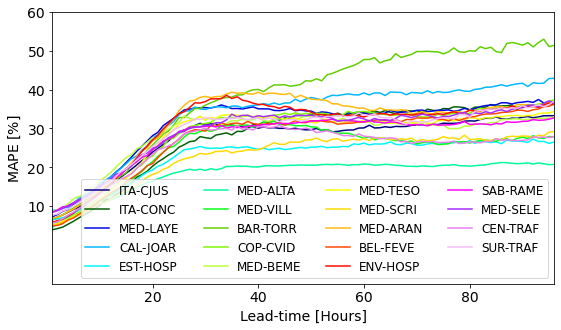

In [43]:
plt.figure(figsize=(9,5))

colors=mcp.gen_color(cmap="gist_ncar",n=20)
lss = ['solid','--','solid','--','solid','--']
for imethod,method in enumerate(['GB_MO']):
    temp_df = mape_df[mape_df['method']==method].iloc[:,:96].dropna()*100
    temp_stations = mape_df[mape_df['method']==method].dropna()['station'].values
    for i in range(len(temp_df)):
        plt.plot(np.arange(1,97),temp_df.values[i],label=temp_stations[i],color=colors[i])

plt.legend(fontsize=12,ncol=4, loc=4)
plt.xticks(fontsize=14)
plt.yticks([10,20,30,40,50,60],fontsize=14)

plt.ylabel(r'MAPE [$\%$]',fontsize=14)
plt.xlim(1,96)
plt.xlabel('Lead-time [Hours]',fontsize=14)
#plt.title('c)',loc='left',fontsize=14)
plt.ylim(-10,60)
#plt.savefig('Figures/MAPE_stations.png',bbox_inches='tight')

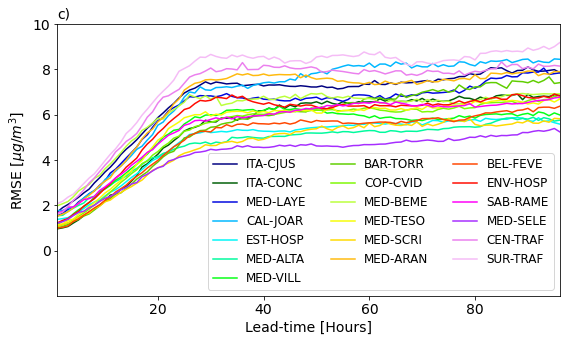

In [28]:
plt.figure(figsize=(9,5))

colors=mcp.gen_color(cmap="gist_ncar",n=20)
lss = ['solid','--','solid','--','solid','--']
for imethod,method in enumerate(['GB_MO']):
    temp_df = rmse_df[mape_df['method']==method].iloc[:,:96].dropna()
    temp_stations = mape_df[mape_df['method']==method].dropna()['station'].values
    for i in range(len(temp_df)):
        plt.plot(np.arange(1,97),temp_df.values[i],label=temp_stations[i],color=colors[i])

plt.ylim(-2,10)
plt.legend(fontsize=12,ncol=3)
plt.xticks(fontsize=14)
plt.yticks([0,2,4,6,8,10],fontsize=14)

plt.ylabel(r'RMSE [$\mu g / m^3$]',fontsize=14)
plt.xlim(1,96)
plt.xlabel('Lead-time [Hours]',fontsize=14)
plt.title('c)',loc='left',fontsize=14)
#plt.savefig('Figures/RMSE_stations.png',bbox_inches='tight')

# Scatters ejemplo

MED-SELE
MED-LAYE
SUR-TRAF


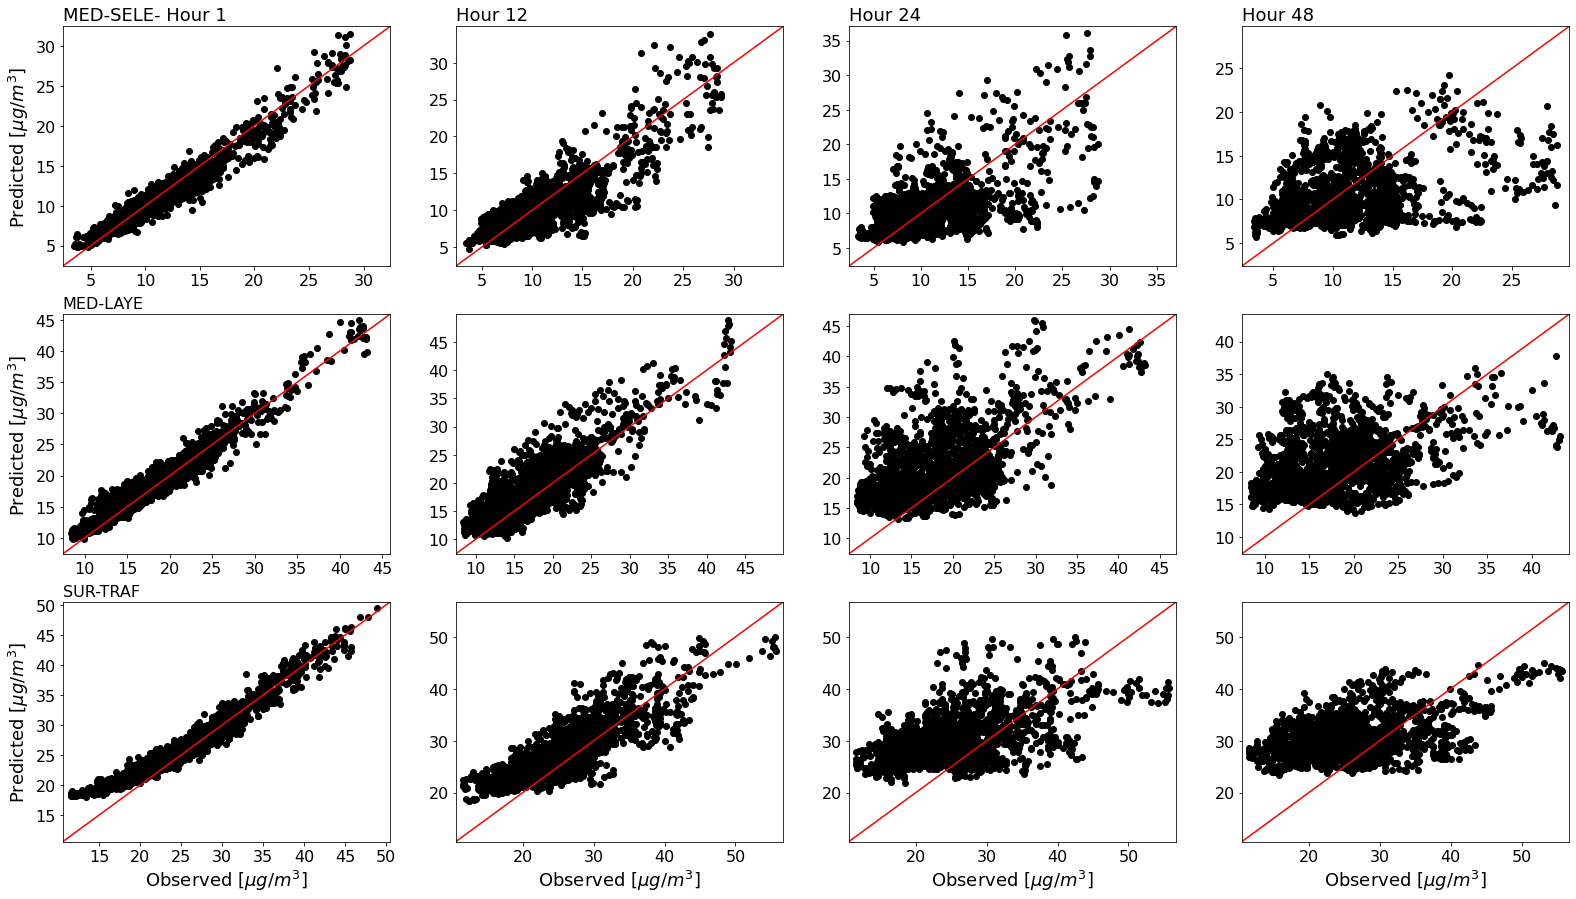

In [177]:
fig = plt.figure(figsize=(27,15))

for istation,station in enumerate(['MED-SELE','MED-LAYE','SUR-TRAF']):
    print(station)
    X = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_X.npy',allow_pickle=True)
    Y_validation = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_Y_validation.npy',allow_pickle=True)
    dates = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_dates.npy',allow_pickle=True)
    scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
    scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')
    X_scaled = scaler_x.transform(X)

    model_name = 'GB_MO'
    estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
    Y_predicted_scaled = estimator_temp.predict(X_scaled)
    Y_predicted = scaler_y.inverse_transform(Y_predicted_scaled)

    for i,leadtime in enumerate([1,12,24,48]):
        ax = fig.add_subplot(3,4,(i+1)+istation*4)
        ax.scatter(Y_validation[:,leadtime-1],Y_predicted[:,leadtime-1],color='k')
        ax.plot([0,100],[0,100],color='red')
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        if (istation==0)&(i>0):
            plt.title(['Hour 12','Hour 24','Hour 48'][i-1],fontsize=18,loc='left')
        if i%4==0:
            if istation==0:
                plt.title(station + '- Hour 1',fontsize=18,loc='left')
            else:
                plt.title(station,fontsize=16,loc='left')
            plt.ylabel(r'Predicted [$\mu g / m^3$]',fontsize=18)
        if istation==2:
            plt.xlabel(r'Observed [$\mu g / m^3$]',fontsize=18)
            
        ax.set_ylim(np.min([Y_validation[:,leadtime-1],Y_predicted[:,leadtime-1]])-1
                    ,np.max([Y_validation[:,leadtime-1],Y_predicted[:,leadtime-1]])+1)
        ax.set_xlim(np.min([Y_validation[:,leadtime-1],Y_predicted[:,leadtime-1]])-1
                    ,np.max([Y_validation[:,leadtime-1],Y_predicted[:,leadtime-1]])+1)
#plt.savefig('Figures/ExamplesScatter.png',bbox_inches='tight')

In [26]:
model_name='GB_MO'
station = 'ITA-CJUS'

estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')

X = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_X.npy',allow_pickle=True)
X_scaled = scaler_x.transform(X)
Y_predicted_scaled = estimator_temp.predict(X_scaled)
Y_predicted = scaler_y.inverse_transform(Y_predicted_scaled)
Y_validation = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+
    station+'_Y_validation.npy',allow_pickle=True)

dates = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+
    station+'_dates.npy',allow_pickle=True)

In [27]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

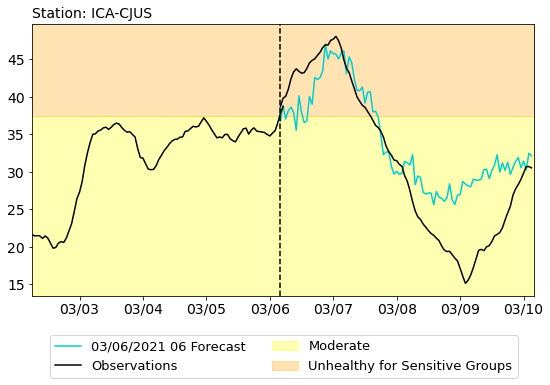

In [9]:
iloc = 685

fig = plt.figure(figsize=(9,5))
ax=fig.add_subplot(111)
index = pd.to_datetime(dates[iloc-1:iloc+95])
plt.plot(index,Y_predicted[iloc],color='darkturquoise',label = '03/06/2021 06 Forecast')
plt.plot(index,Y_validation[iloc],color='k')

index = pd.to_datetime(dates[iloc-95:iloc+1])
plt.plot(index,Y_validation[iloc-95],color='k',label='Observations')
plt.axvline(dates[iloc-1],color='k',ls = '--')
limites_ica = {'Good':(0,12.5),
              'Moderate':(12.5,37.5),
              'Unhealthy for Sensitive Groups':(37.5,55.5),
              'Unhealthy':(55.5,150.5),
              'Very Unhealthy':(150.5,250.5),
              'Hazardous':(250.5,500)}

colores_ica = ['green','yellow','orange','red','purple','brown']

ylim = plt.gca().get_ylim()

# for i in range(len(colores_ica)):
for i in [1,2]:
    plt.fill_between([dates[iloc]-dt.timedelta(hours=95),dates[iloc]+dt.timedelta(hours=95)],
                limites_ica[list(limites_ica.keys())[i]][0],
                limites_ica[list(limites_ica.keys())[i]][1],
                alpha=0.3,color=colores_ica[i],label=list(limites_ica.keys())[i])

    
plt.ylim(ylim[0], ylim[1])
plt.legend(ncol=2,bbox_to_anchor=(0.98, -0.12),fontsize=13)
plt.xlim(dates[iloc]-dt.timedelta(hours=95),dates[iloc]+dt.timedelta(hours=95))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Define the date format
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)
# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

plt.title('Station: ICA-CJUS',loc='left',fontsize=14)
#plt.savefig('Figures/Example_ITA',bbox_inches='tight')

## V2, now including no fires or no CAMS

In [28]:
where_CAMS = slice(48,81)
where_ifrp = slice(180,213)

In [29]:
model_name='GB_MO'
station = 'ITA-CJUS'

estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')

X = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_X.npy',allow_pickle=True)
X[:,where_CAMS] = 0
X_scaled = scaler_x.transform(X)
Y_predicted_scaled = estimator_temp.predict(X_scaled)
Y_predicted_nocams = scaler_y.inverse_transform(Y_predicted_scaled)
Y_validation = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+
    station+'_Y_validation.npy',allow_pickle=True)

dates = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+
    station+'_dates.npy',allow_pickle=True)

In [30]:
model_name='GB_MO'
station = 'ITA-CJUS'

estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')

X = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_X.npy',allow_pickle=True)
X[:,where_ifrp] = 0
X_scaled = scaler_x.transform(X)
Y_predicted_scaled = estimator_temp.predict(X_scaled)
Y_predicted_noifrp = scaler_y.inverse_transform(Y_predicted_scaled)
Y_validation = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+
    station+'_Y_validation.npy',allow_pickle=True)

dates = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+
    station+'_dates.npy',allow_pickle=True)

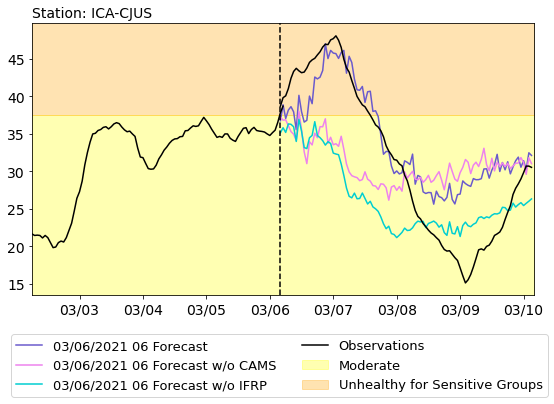

In [36]:
iloc = 685

fig = plt.figure(figsize=(9,5))
ax=fig.add_subplot(111)
index = pd.to_datetime(dates[iloc-1:iloc+95])
plt.plot(index,Y_predicted[iloc],color='slateblue',label = '03/06/2021 06 Forecast')
plt.plot(index,Y_predicted_nocams[iloc],color='violet',label = '03/06/2021 06 Forecast w/o CAMS')
plt.plot(index,Y_predicted_noifrp[iloc],color='darkturquoise',label = '03/06/2021 06 Forecast w/o IFRP')
plt.plot(index,Y_validation[iloc],color='k')

index = pd.to_datetime(dates[iloc-95:iloc+1])
plt.plot(index,Y_validation[iloc-95],color='k',label='Observations')
plt.axvline(dates[iloc-1],color='k',ls = '--')
limites_ica = {'Good':(0,12.5),
              'Moderate':(12.5,37.5),
              'Unhealthy for Sensitive Groups':(37.5,55.5),
              'Unhealthy':(55.5,150.5),
              'Very Unhealthy':(150.5,250.5),
              'Hazardous':(250.5,500)}

colores_ica = ['green','yellow','orange','red','purple','brown']

ylim = plt.gca().get_ylim()

# for i in range(len(colores_ica)):
for i in [1,2]:
    plt.fill_between([dates[iloc]-dt.timedelta(hours=95),dates[iloc]+dt.timedelta(hours=95)],
                limites_ica[list(limites_ica.keys())[i]][0],
                limites_ica[list(limites_ica.keys())[i]][1],
                alpha=0.3,color=colores_ica[i],label=list(limites_ica.keys())[i])

    
plt.ylim(ylim[0], ylim[1])
plt.legend(ncol=2,bbox_to_anchor=(1.04, -0.12),fontsize=13)
plt.xlim(dates[iloc]-dt.timedelta(hours=95),dates[iloc]+dt.timedelta(hours=95))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Define the date format
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)
# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

plt.title('Station: ICA-CJUS',loc='left',fontsize=14)
#plt.savefig('Figures/Example_ITA',bbox_inches='tight')

## error por horas

In [385]:
model_name='GB_MO'
CD_ERROR = []
CD_MAPE = []

for station in stations:
    estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
    scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
    scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')

    X = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_X.npy',allow_pickle=True)
    X_scaled = scaler_x.transform(X)
    Y_predicted_scaled = estimator_temp.predict(X_scaled)
    Y_predicted = scaler_y.inverse_transform(Y_predicted_scaled)
    Y_validation = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+
        station+'_Y_validation.npy',allow_pickle=True)
    
    dates = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+
    station+'_dates.npy',allow_pickle=True)
    df_hours = pd.DataFrame(np.array([(pd.to_datetime(dates) + dt.timedelta(hours=i)).hour for i in range(1,97)]).T, 
                        index=dates,columns = np.arange(1,97))


    error_matrix = (Y_validation - Y_predicted)**2
    mape_matrix = abs((Y_validation - Y_predicted) * 100 / Y_predicted)

    cd_error = np.zeros([24,96])
    cd_mape = np.zeros([24,96])
    for leadtime in range(1,97):
        error_temp = error_matrix[:,leadtime-1]
        mape_temp = mape_matrix[:,leadtime-1]
        for hour in range(0,24):
            error_temp_hour = error_temp[np.where(df_hours[leadtime]==hour)[0]]
            mape_temp_hour = mape_temp[np.where(df_hours[leadtime]==hour)[0]]
            cd_error[hour,leadtime-1] = np.mean(np.sqrt(error_temp_hour))
            cd_mape[hour,leadtime-1] = np.mean(mape_temp_hour)

    CD_ERROR.append(cd_error)
    CD_MAPE.append(cd_mape)

In [386]:
CD_ERROR = np.array(CD_ERROR)
CD_MAPE = np.array(CD_MAPE)

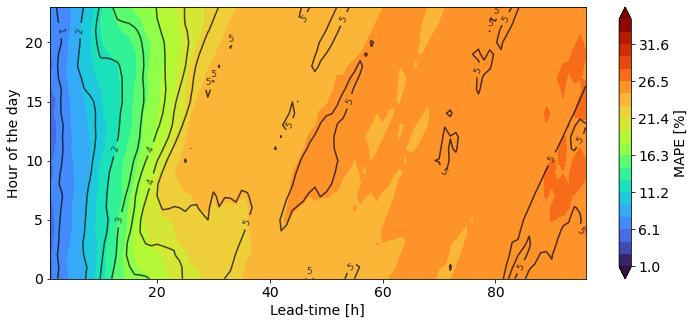

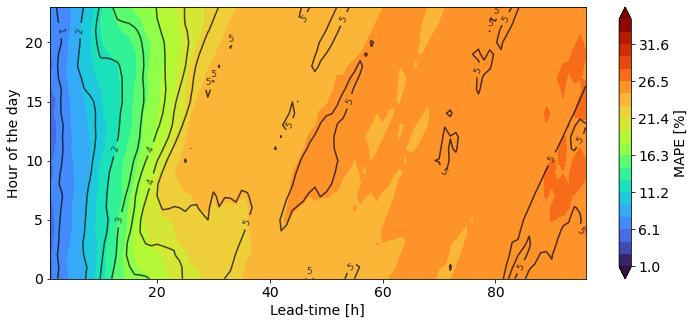

In [476]:
plt.close('all')
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
mini = 1
maxi = 35
intervals = 21
bounds=np.linspace(mini,maxi,intervals)
CS = plt.contourf(np.arange(1,97),np.arange(0,24),np.mean(CD_MAPE,axis=0),vmin=mini,vmax=maxi,cmap='turbo', 
                  levels = bounds,extend='both')
CT = plt.contour(np.arange(1,97),np.arange(0,24),np.mean(CD_ERROR,axis=0),7,colors='k',alpha = 0.7)
ax.clabel(CT, fontsize=9, inline=1,fmt = '%1.0f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Lead-time [h]',fontsize=14)
plt.ylabel('Hour of the day',fontsize=14)
# plt.title(model_name+' forecast - '+station,fontsize=16)
cbar = plt.colorbar(CS)
cbar.set_label('MAPE [%]',fontsize=14)
cbar.ax.tick_params(labelsize=14) 
#plt.savefig('Figures/CD_Error',bbox_inches='tight')

# Features importance

In [77]:
model_name='GB_MO'

In [74]:
stations = ["ITA-CJUS", "ITA-CONC", "MED-LAYE", "CAL-JOAR", "EST-HOSP", "MED-ALTA", "MED-VILL",
            "BAR-TORR", "COP-CVID", "MED-BEME", "MED-TESO", "MED-SCRI", "MED-ARAN", "BEL-FEVE", "ENV-HOSP", 
            "SAB-RAME", "MED-SELE","CEN-TRAF","SUR-TRAF"]

In [78]:
importances_full = []
for station in stations:
    estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
    importances = np.zeros([269,96])
    for leadtime in range(1,97):
        importances[:,leadtime-1] = estimator_temp.estimators_[leadtime-1].feature_importances_
    importances_full.append(importances)

In [79]:
importances_full = np.array(importances_full)

In [80]:
mean_importance = np.mean(importances_full,axis=0)

df_importances = pd.DataFrame()

df_importances['Past PM2.5 concentrations'] = np.sum(mean_importance[0:48],axis=0)
df_importances['AOD-CAMS'] = np.sum(mean_importance[48:81],axis=0)
df_importances['TCC-GFS'] = np.sum(mean_importance[81:114],axis=0)
df_importances['PRATE-GFS'] = np.sum(mean_importance[114:147],axis=0)
df_importances['HPBL-GFS'] = np.sum(mean_importance[147:180],axis=0)
df_importances['IFRP'] = np.sum(mean_importance[180:213],axis=0)
df_importances['Day of the week'] = np.sum(mean_importance[213:221],axis=0)
df_importances['Hour of the day'] = np.sum(mean_importance[221:269],axis=0)

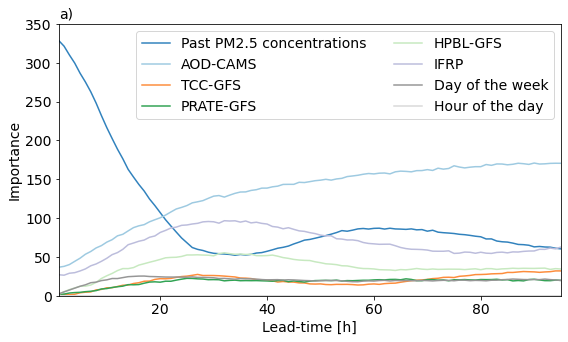

In [81]:
colors=mcp.gen_color(cmap="tab20c",n=8)

plt.figure(figsize=(9,5))
for ikey,key in enumerate(list(df_importances.keys())):
    plt.plot(df_importances[key],label=key,color=colors[ikey])
plt.ylabel('Importance',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Lead-time [h]',fontsize=14)
plt.xlim(1,95)
plt.ylim(0,350)
plt.title('a)',loc='left',fontsize=14)
plt.legend(fontsize=14,ncol=2)#,bbox_to_anchor=(1.,1.03))
#plt.savefig('Figures/FeatureImportances',bbox_inches='tight')

# Para cada estación

In [62]:
s=-1

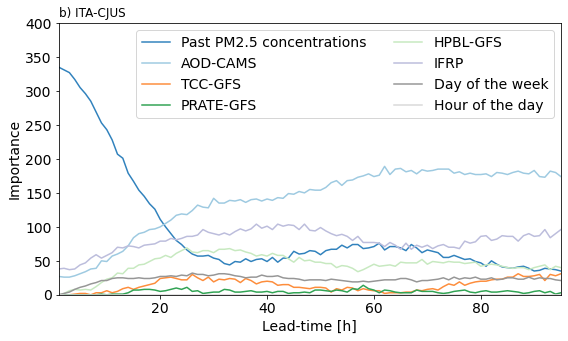

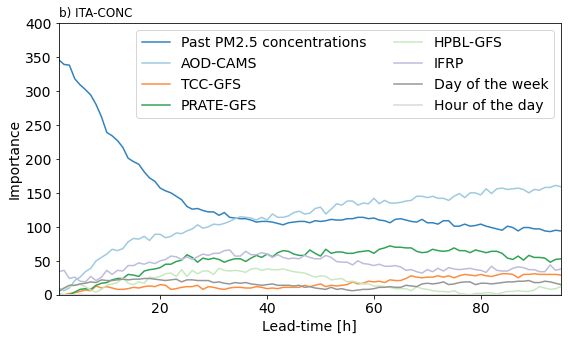

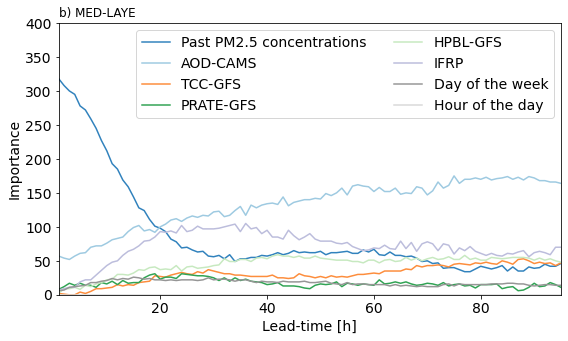

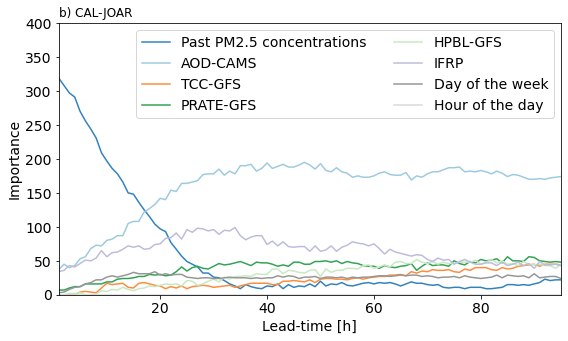

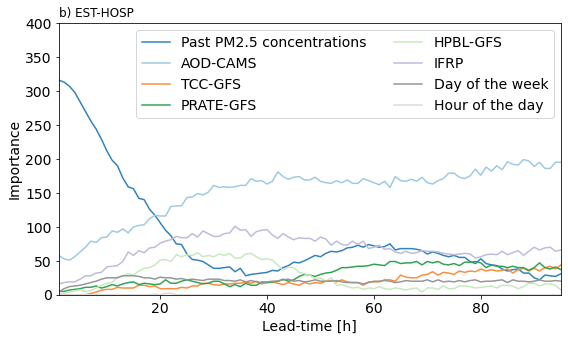

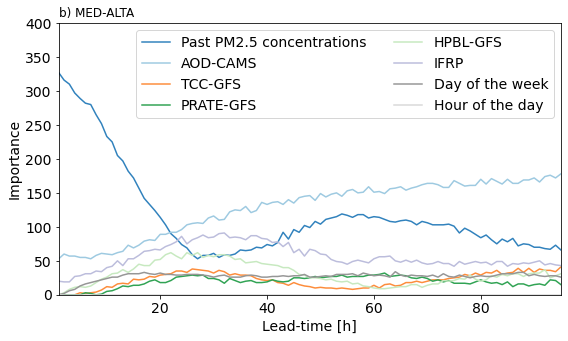

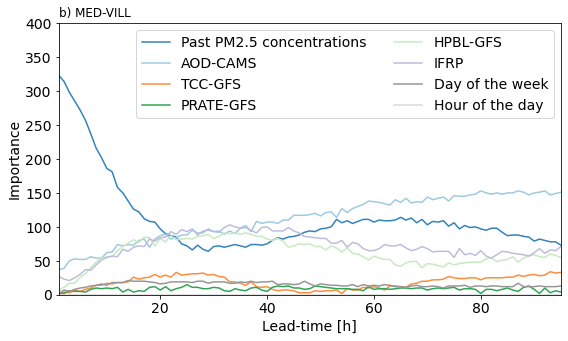

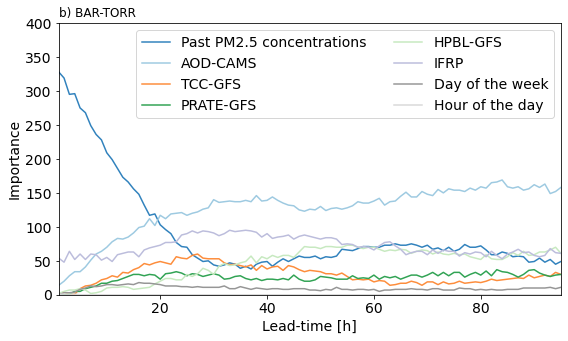

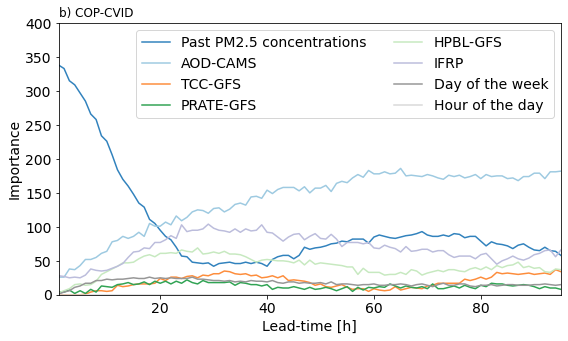

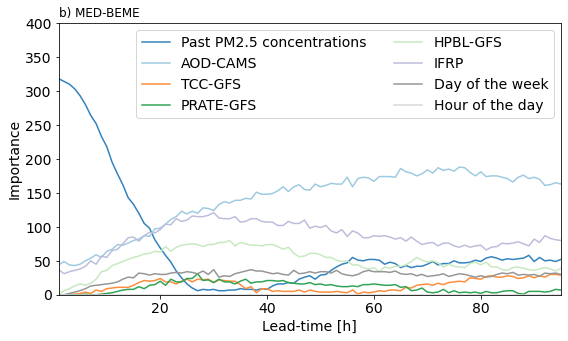

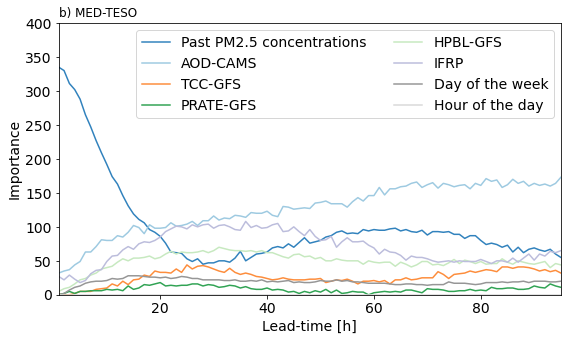

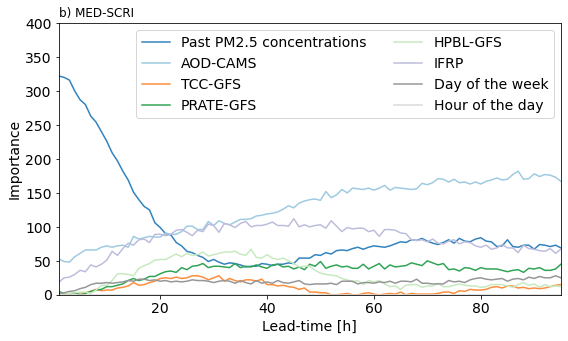

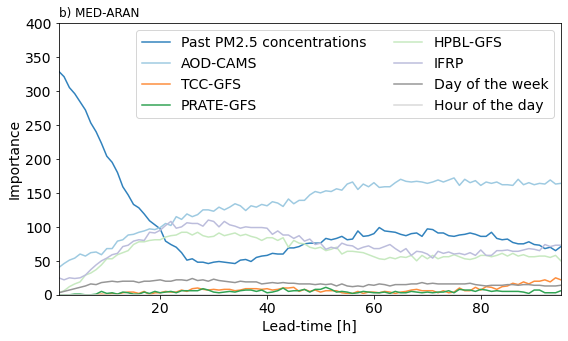

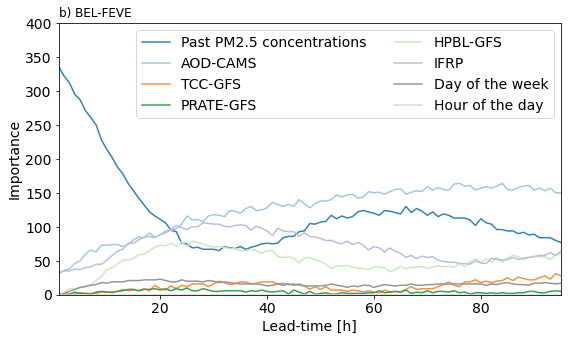

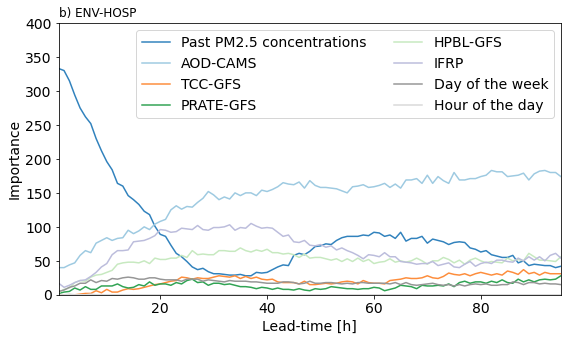

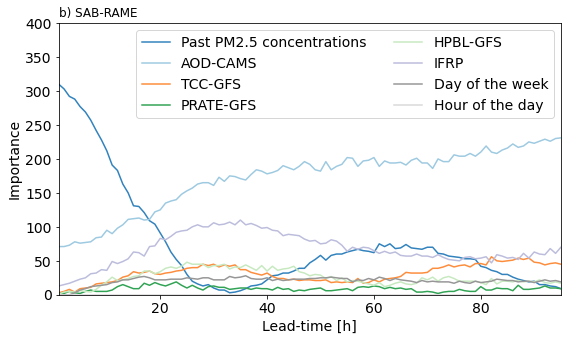

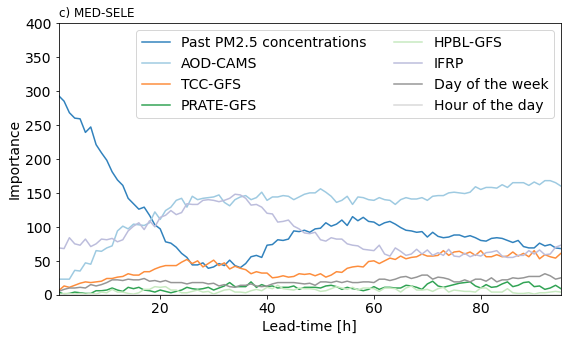

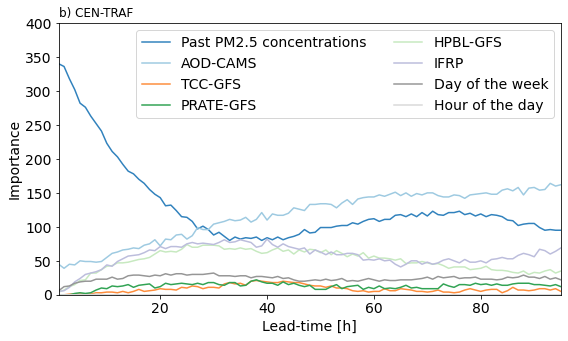

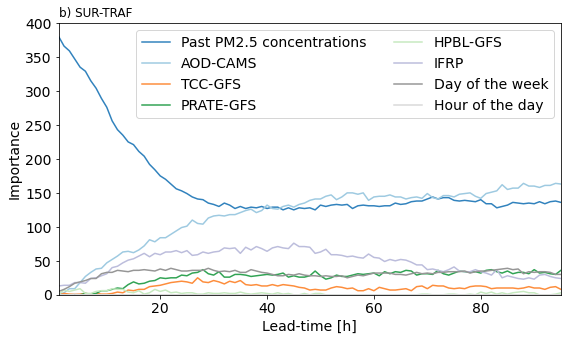

In [73]:
for s in range(len(importances_full)):
    mean_importance = importances_full[s]

    df_importances = pd.DataFrame()

    df_importances['Past PM2.5 concentrations'] = np.sum(mean_importance[0:48],axis=0)
    df_importances['AOD-CAMS'] = np.sum(mean_importance[48:81],axis=0)
    df_importances['TCC-GFS'] = np.sum(mean_importance[81:114],axis=0)
    df_importances['PRATE-GFS'] = np.sum(mean_importance[114:147],axis=0)
    df_importances['HPBL-GFS'] = np.sum(mean_importance[147:180],axis=0)
    df_importances['IFRP'] = np.sum(mean_importance[180:213],axis=0)
    df_importances['Day of the week'] = np.sum(mean_importance[213:221],axis=0)
    df_importances['Hour of the day'] = np.sum(mean_importance[221:269],axis=0)
    
    colors=mcp.gen_color(cmap="tab20c",n=8)

    plt.figure(figsize=(9,5))
    for ikey,key in enumerate(list(df_importances.keys())):
        plt.plot(df_importances[key],label=key,color=colors[ikey])
    plt.ylabel('Importance',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Lead-time [h]',fontsize=14)
    plt.xlim(1,95)
    plt.ylim(0,400)
    plt.legend(fontsize=14,ncol=2)#,bbox_to_anchor=(1.,1.03))
    plt.title('b) '+stations[s],loc='left')
    if stations[s]=='MED-SELE':
        plt.title('c) '+stations[s],loc='left')
    #plt.savefig('Figures/FeatureImportances_'+stations[s],bbox_inches='tight')

# permutation importance

In [82]:
from sklearn.inspection import permutation_importance

In [127]:
model_name

'GB_MO'

In [ ]:
importances_full = []
for station in stations:
    estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
    importances = np.zeros([269,96])
    
    print(station)
    X = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_X.npy',allow_pickle=True)
    Y_validation = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_Y_validation.npy',allow_pickle=True)
    dates = np.load('/var/data1/AQ_Forecast_DATA/validation_results/'+station+'_dates.npy',allow_pickle=True)
    scaler_x = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_X.scl')
    scaler_y = joblib.load('/var/data1/AQ_Forecast_DATA/scalers/'+station+'_Y.scl')
    X_scaled = scaler_x.transform(X)
    Y_validation_scaled = scaler_y.transform(Y_validation)

    estimator_temp = joblib.load('/var/data1/AQ_Forecast_DATA/trained_estimators/'+station+'_'+model_name+'.mdl')
    result = np.zeros([269,96])
    for lt in range(96):
        print(lt)
        result[:,lt] = permutation_importance(
            estimator_temp.estimators_[lt], X_scaled, Y_validation_scaled[:,lt], 
            n_repeats=10, random_state=42, n_jobs=1)['importances_mean']
    importances_full.append(result)

ITA-CJUS
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
ITA-CONC
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
MED-LAYE
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
CAL-JOAR
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

In [133]:
np.save('/var/data1/AQ_Forecast_DATA/results/PermutationImportances.npy',np.array(importances_full))

In [134]:
importances_full=np.array(importances_full)

In [138]:
importances_full = abs(importances_full)

In [144]:
mean_importance = np.mean(importances_full,axis=0)

df_importances = pd.DataFrame()

df_importances['Past PM2.5 concentrations'] = np.sum(mean_importance[0:48],axis=0)
df_importances['AOD-CAMS'] = np.sum(mean_importance[48:81],axis=0)
df_importances['TCC-GFS'] = np.sum(mean_importance[81:114],axis=0)
df_importances['PRATE-GFS'] = np.sum(mean_importance[114:147],axis=0)
df_importances['HPBL-GFS'] = np.sum(mean_importance[147:180],axis=0)
df_importances['IFRP'] = np.sum(mean_importance[180:213],axis=0)
df_importances['Day of the week'] = np.sum(mean_importance[213:221],axis=0)
df_importances['Hour of the day'] = np.sum(mean_importance[221:269],axis=0)

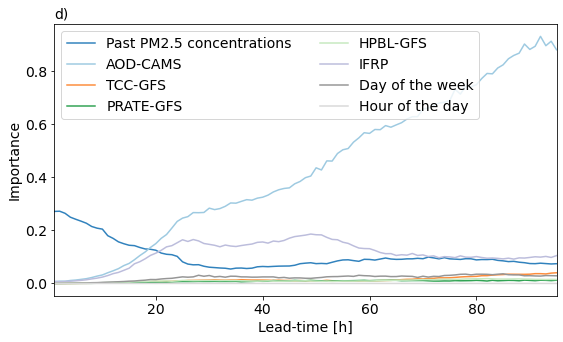

In [145]:
colors=mcp.gen_color(cmap="tab20c",n=8)

plt.figure(figsize=(9,5))
for ikey,key in enumerate(list(df_importances.keys())):
    plt.plot(df_importances[key],label=key,color=colors[ikey])
plt.ylabel('Importance',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Lead-time [h]',fontsize=14)
plt.xlim(1,95)
# plt.ylim(0,350)
plt.title('d)',loc='left',fontsize=14)
plt.legend(fontsize=14,ncol=2)#,bbox_to_anchor=(1.,1.03))
#plt.savefig('Figures/FeatureImportances_Permutations',bbox_inches='tight')

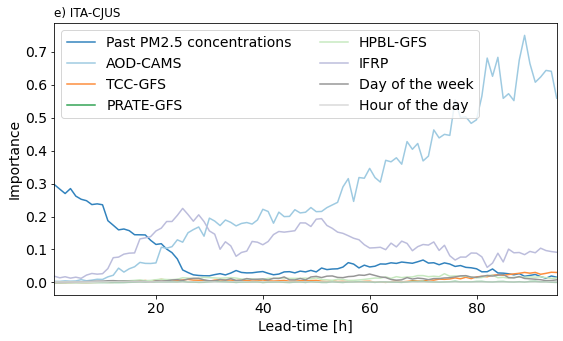

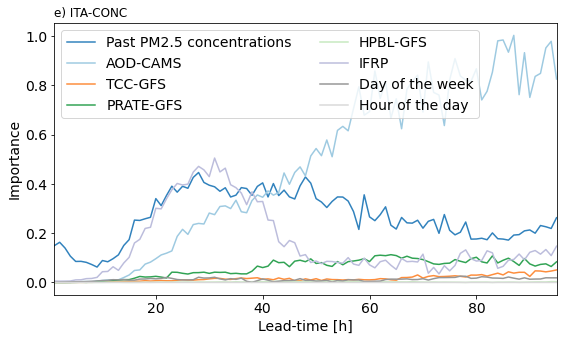

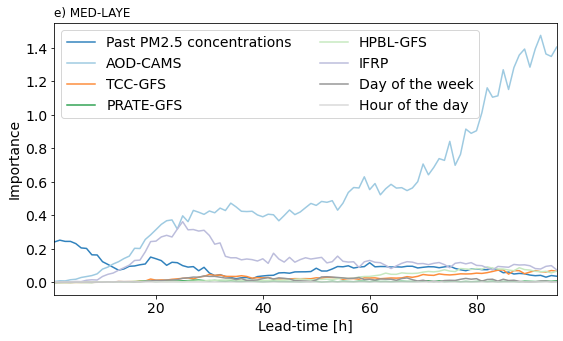

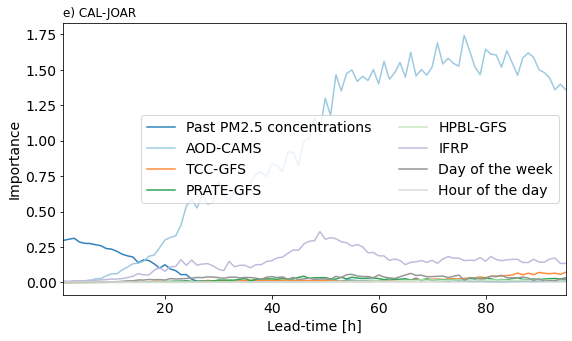

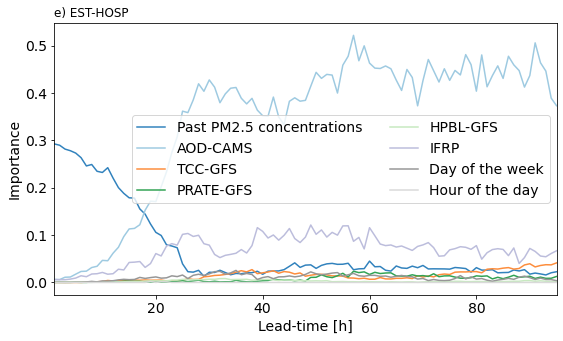

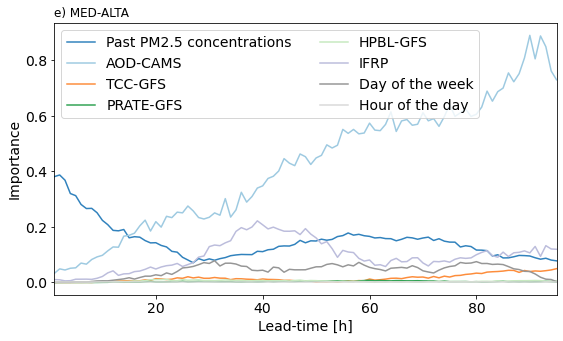

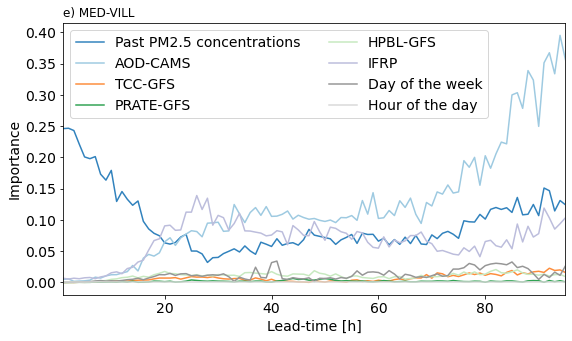

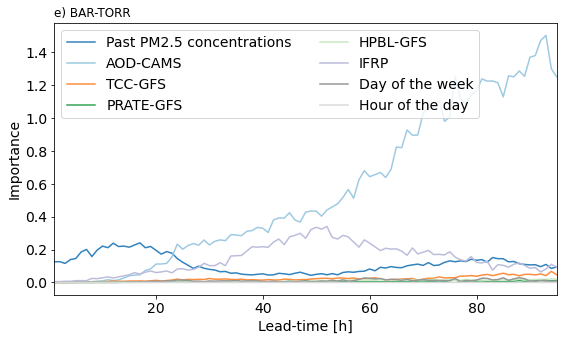

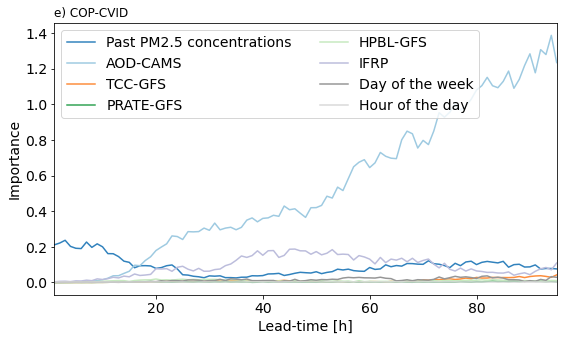

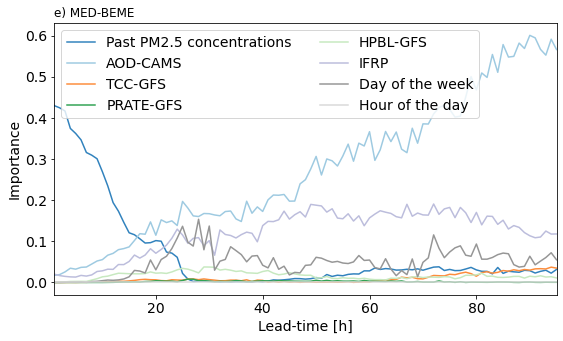

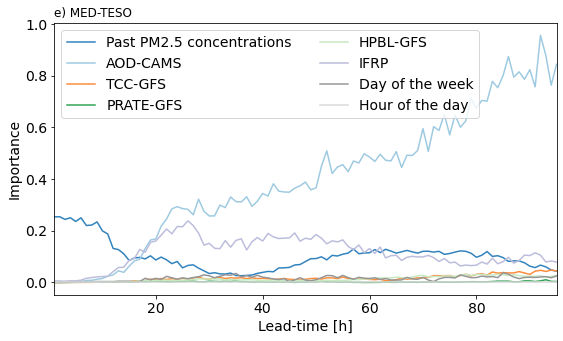

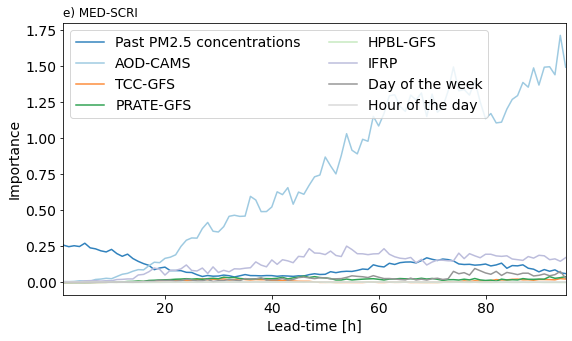

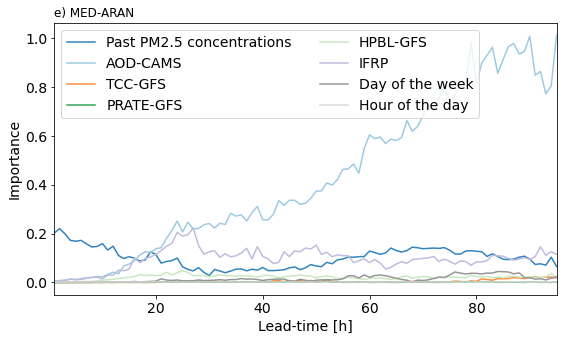

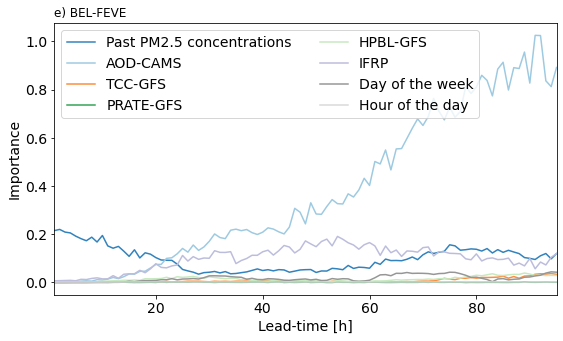

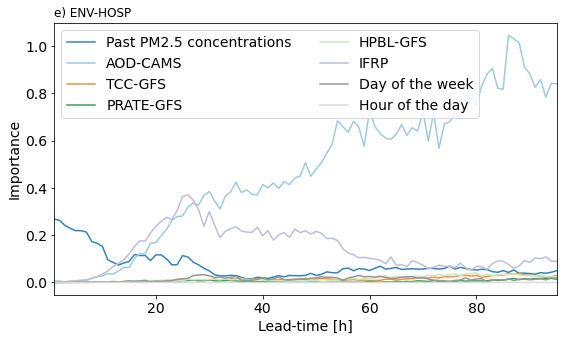

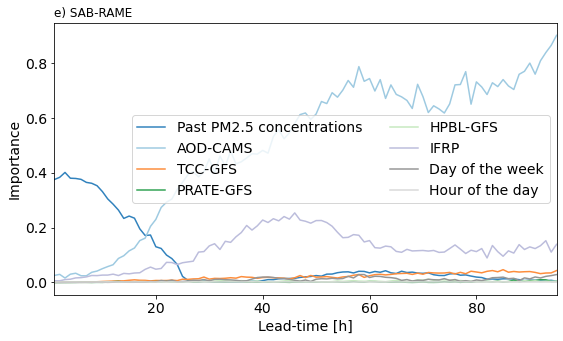

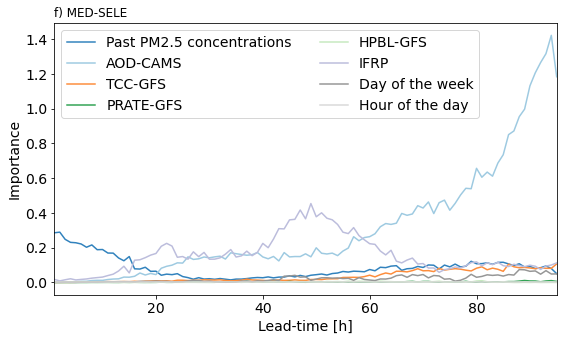

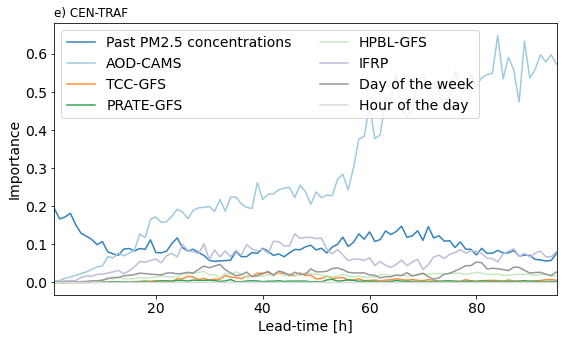

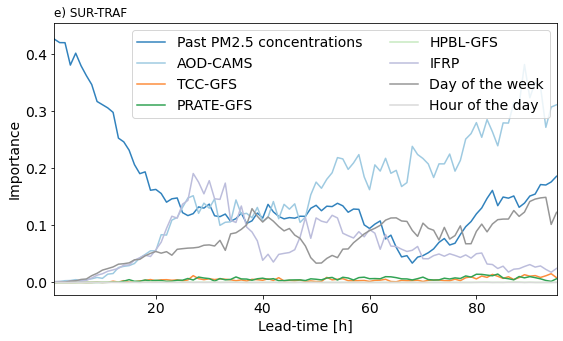

In [142]:
for s in range(len(importances_full)):
    mean_importance = importances_full[s]

    df_importances = pd.DataFrame()

    df_importances['Past PM2.5 concentrations'] = np.sum(mean_importance[0:48],axis=0)
    df_importances['AOD-CAMS'] = np.sum(mean_importance[48:81],axis=0)
    df_importances['TCC-GFS'] = np.sum(mean_importance[81:114],axis=0)
    df_importances['PRATE-GFS'] = np.sum(mean_importance[114:147],axis=0)
    df_importances['HPBL-GFS'] = np.sum(mean_importance[147:180],axis=0)
    df_importances['IFRP'] = np.sum(mean_importance[180:213],axis=0)
    df_importances['Day of the week'] = np.sum(mean_importance[213:221],axis=0)
    df_importances['Hour of the day'] = np.sum(mean_importance[221:269],axis=0)
    
    colors=mcp.gen_color(cmap="tab20c",n=8)

    plt.figure(figsize=(9,5))
    for ikey,key in enumerate(list(df_importances.keys())):
        plt.plot(df_importances[key],label=key,color=colors[ikey])
    plt.ylabel('Importance',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Lead-time [h]',fontsize=14)
    plt.xlim(1,95)
#     plt.ylim(0,400)
    plt.legend(fontsize=14,ncol=2)#,bbox_to_anchor=(1.,1.03))
    plt.title('e) '+stations[s],loc='left')
    if stations[s]=='MED-SELE':
        plt.title('f) '+stations[s],loc='left')
    #plt.savefig('Figures/PermutationFeatureImportances_'+stations[s],bbox_inches='tight')